# Carys BM789 Day0
## Xiaonan Wang
## 15Mar2020

In [1]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import os
import smqpp
import re
import anndata

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

/home/xw251/miniconda3/envs/scanpy_py368/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


scanpy==1.5.0 anndata==0.7.1 numpy==1.18.2 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1 leidenalg==0.7.0


# Read in Data

In [2]:
adata = sc.read('./write/BM789_raw_Day0.h5ad')

In [3]:
sc.pp.filter_genes(adata, min_cells=1)

filtered out 28998 genes that are detected in less than 1 cells


In [4]:
smqpp.normalise_data(adata)

Calculate SF for genes:
Filtered matrix shape: (228, 297)
Number of valid means:297
Calculate SF for erccs:
Filtered matrix shape: (228, 8)
Number of valid means:8


In [5]:
adata.raw = adata

In [6]:
adata.write('./write/BM789_Day0_lognorm_afterQC.h5ad')

# Subset HVGs

In [7]:
adata = sc.read('./write/BM789_Day0_lognorm_afterQC.h5ad')

In [8]:
# Here if useERCC = True, there are too few genes
smqpp.tech_var(adata, useERCC=False, meanForFit=10) 

MeanForFit:  10
7813
Length of HVGs: 2394


/home/xw251/miniconda3/envs/scanpy_py368/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:278: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  DomainWarning)


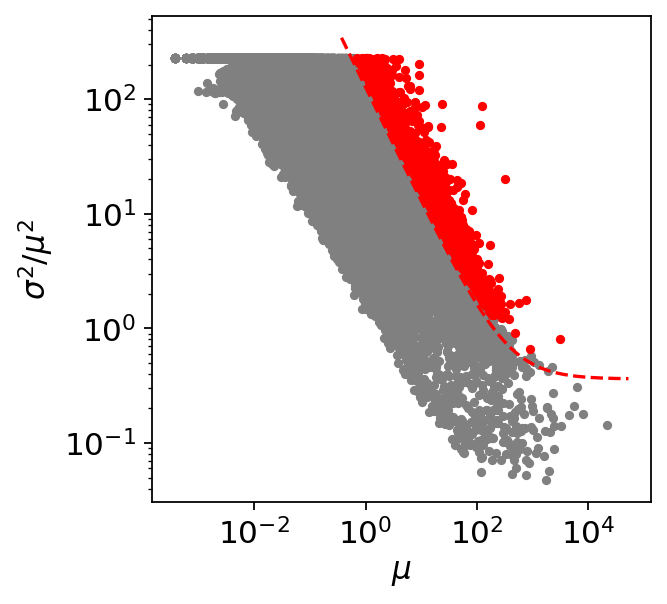

In [9]:
smqpp.plot_tech_var(adata)

In [10]:
adata.shape

(228, 36990)

In [11]:
adata = adata[:,adata.uns['varGenes']['genes']['highVar']].copy()

In [12]:
adata.shape

(228, 2394)

In [13]:
# scale for pca
sc.pp.scale(adata)

In [14]:
adata.obs['Batch'].value_counts().sort_index()

S07    74
S08    65
S09    89
Name: Batch, dtype: int64

# Visualisation

computing PCA with n_comps = 50
    finished (0:00:00)


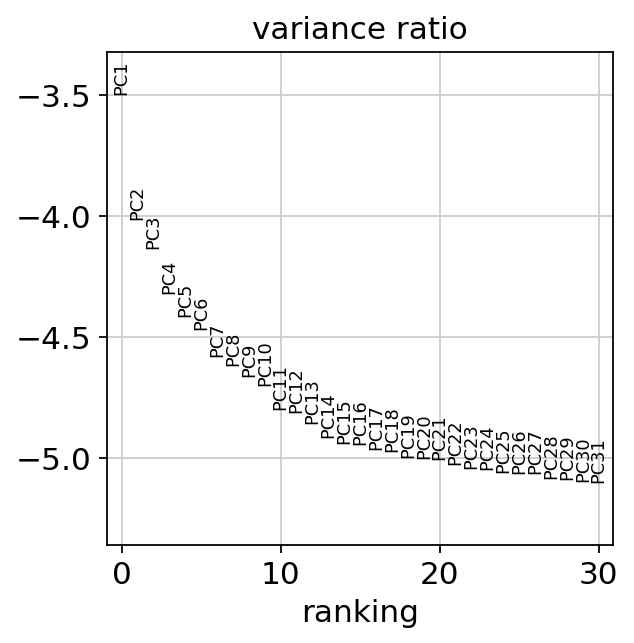

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
computing tSNE
    using 'X_pca' with n_pcs = 50
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:01)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:00)


In [15]:
sc.tl.pca(adata,svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)
sc.tl.tsne(adata)
sc.tl.draw_graph(adata)

In [16]:
adata.write('./write/BM789_Day0_processed.h5ad')

# Plot them out

In [4]:
main_keys = ['Day', 'Cell_Type', 'Condition', 'Plate_number', 'Batch',
            'n_counts', 'n_genes', 'eGFP_norm', 'phase']

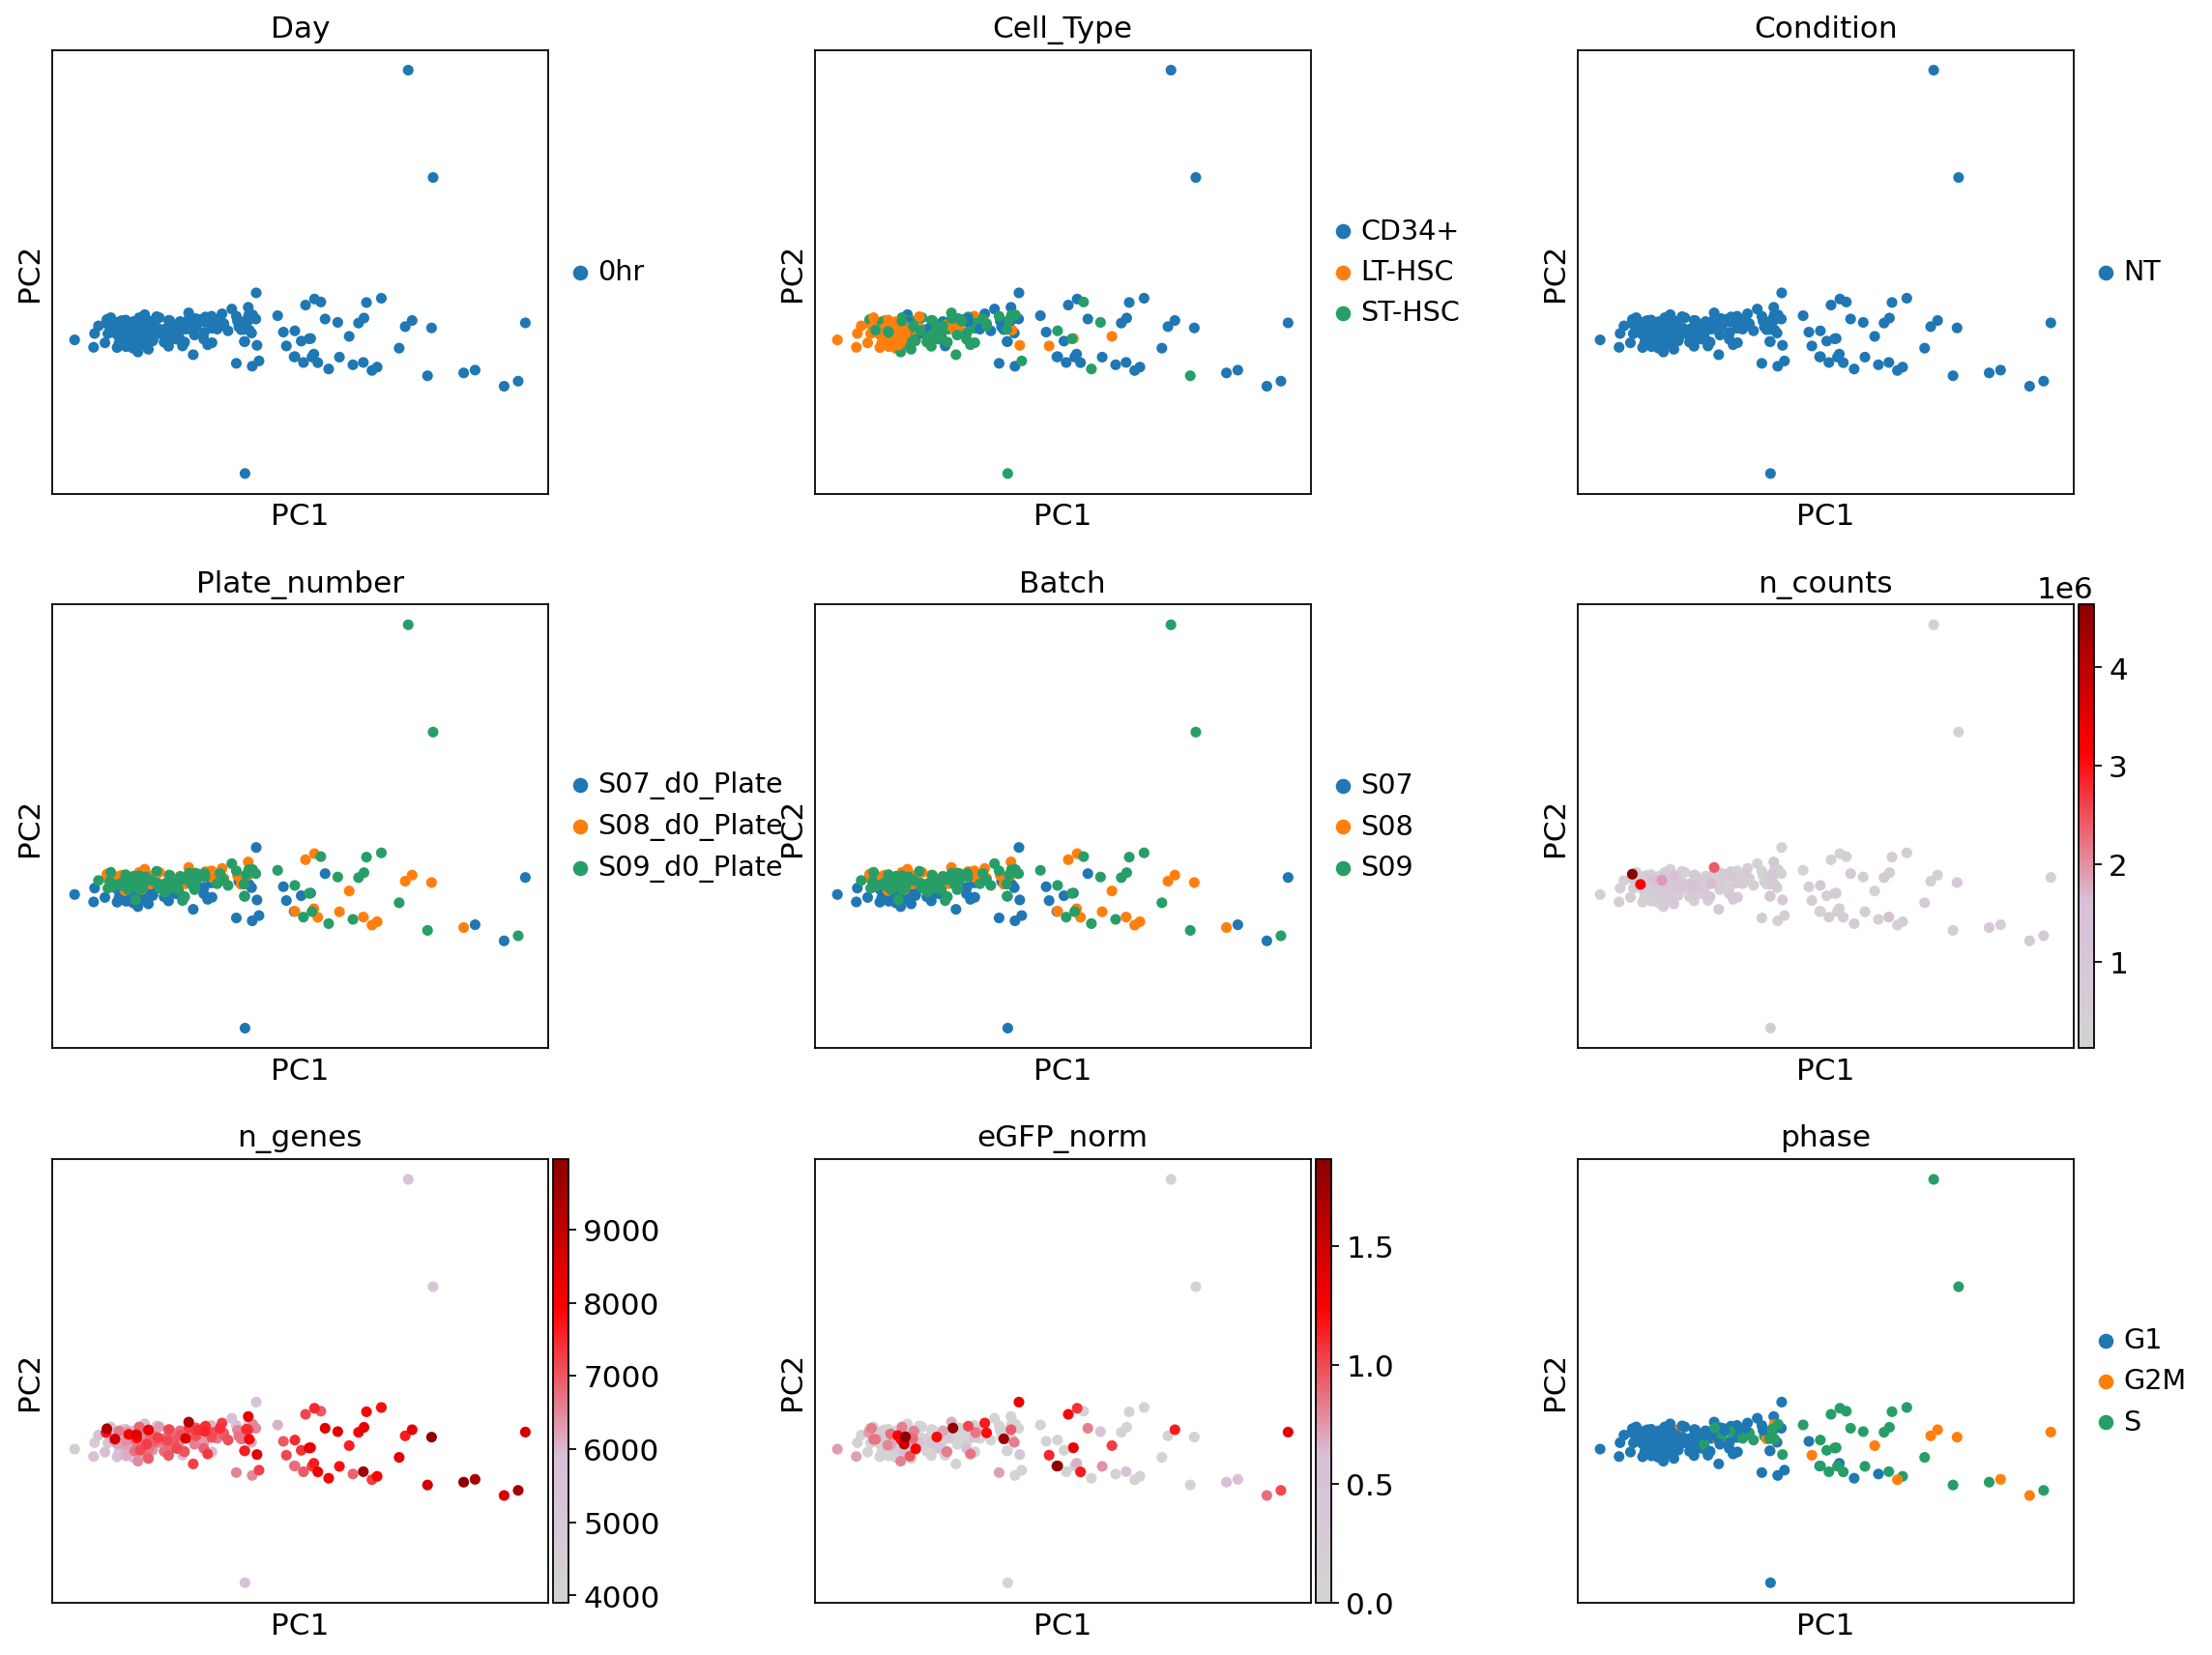

In [18]:
sc.pl.pca_scatter(adata, color=main_keys,s=100, wspace=0.4, ncols=3, color_map=cmap, save='_BM789_Day0.pdf')

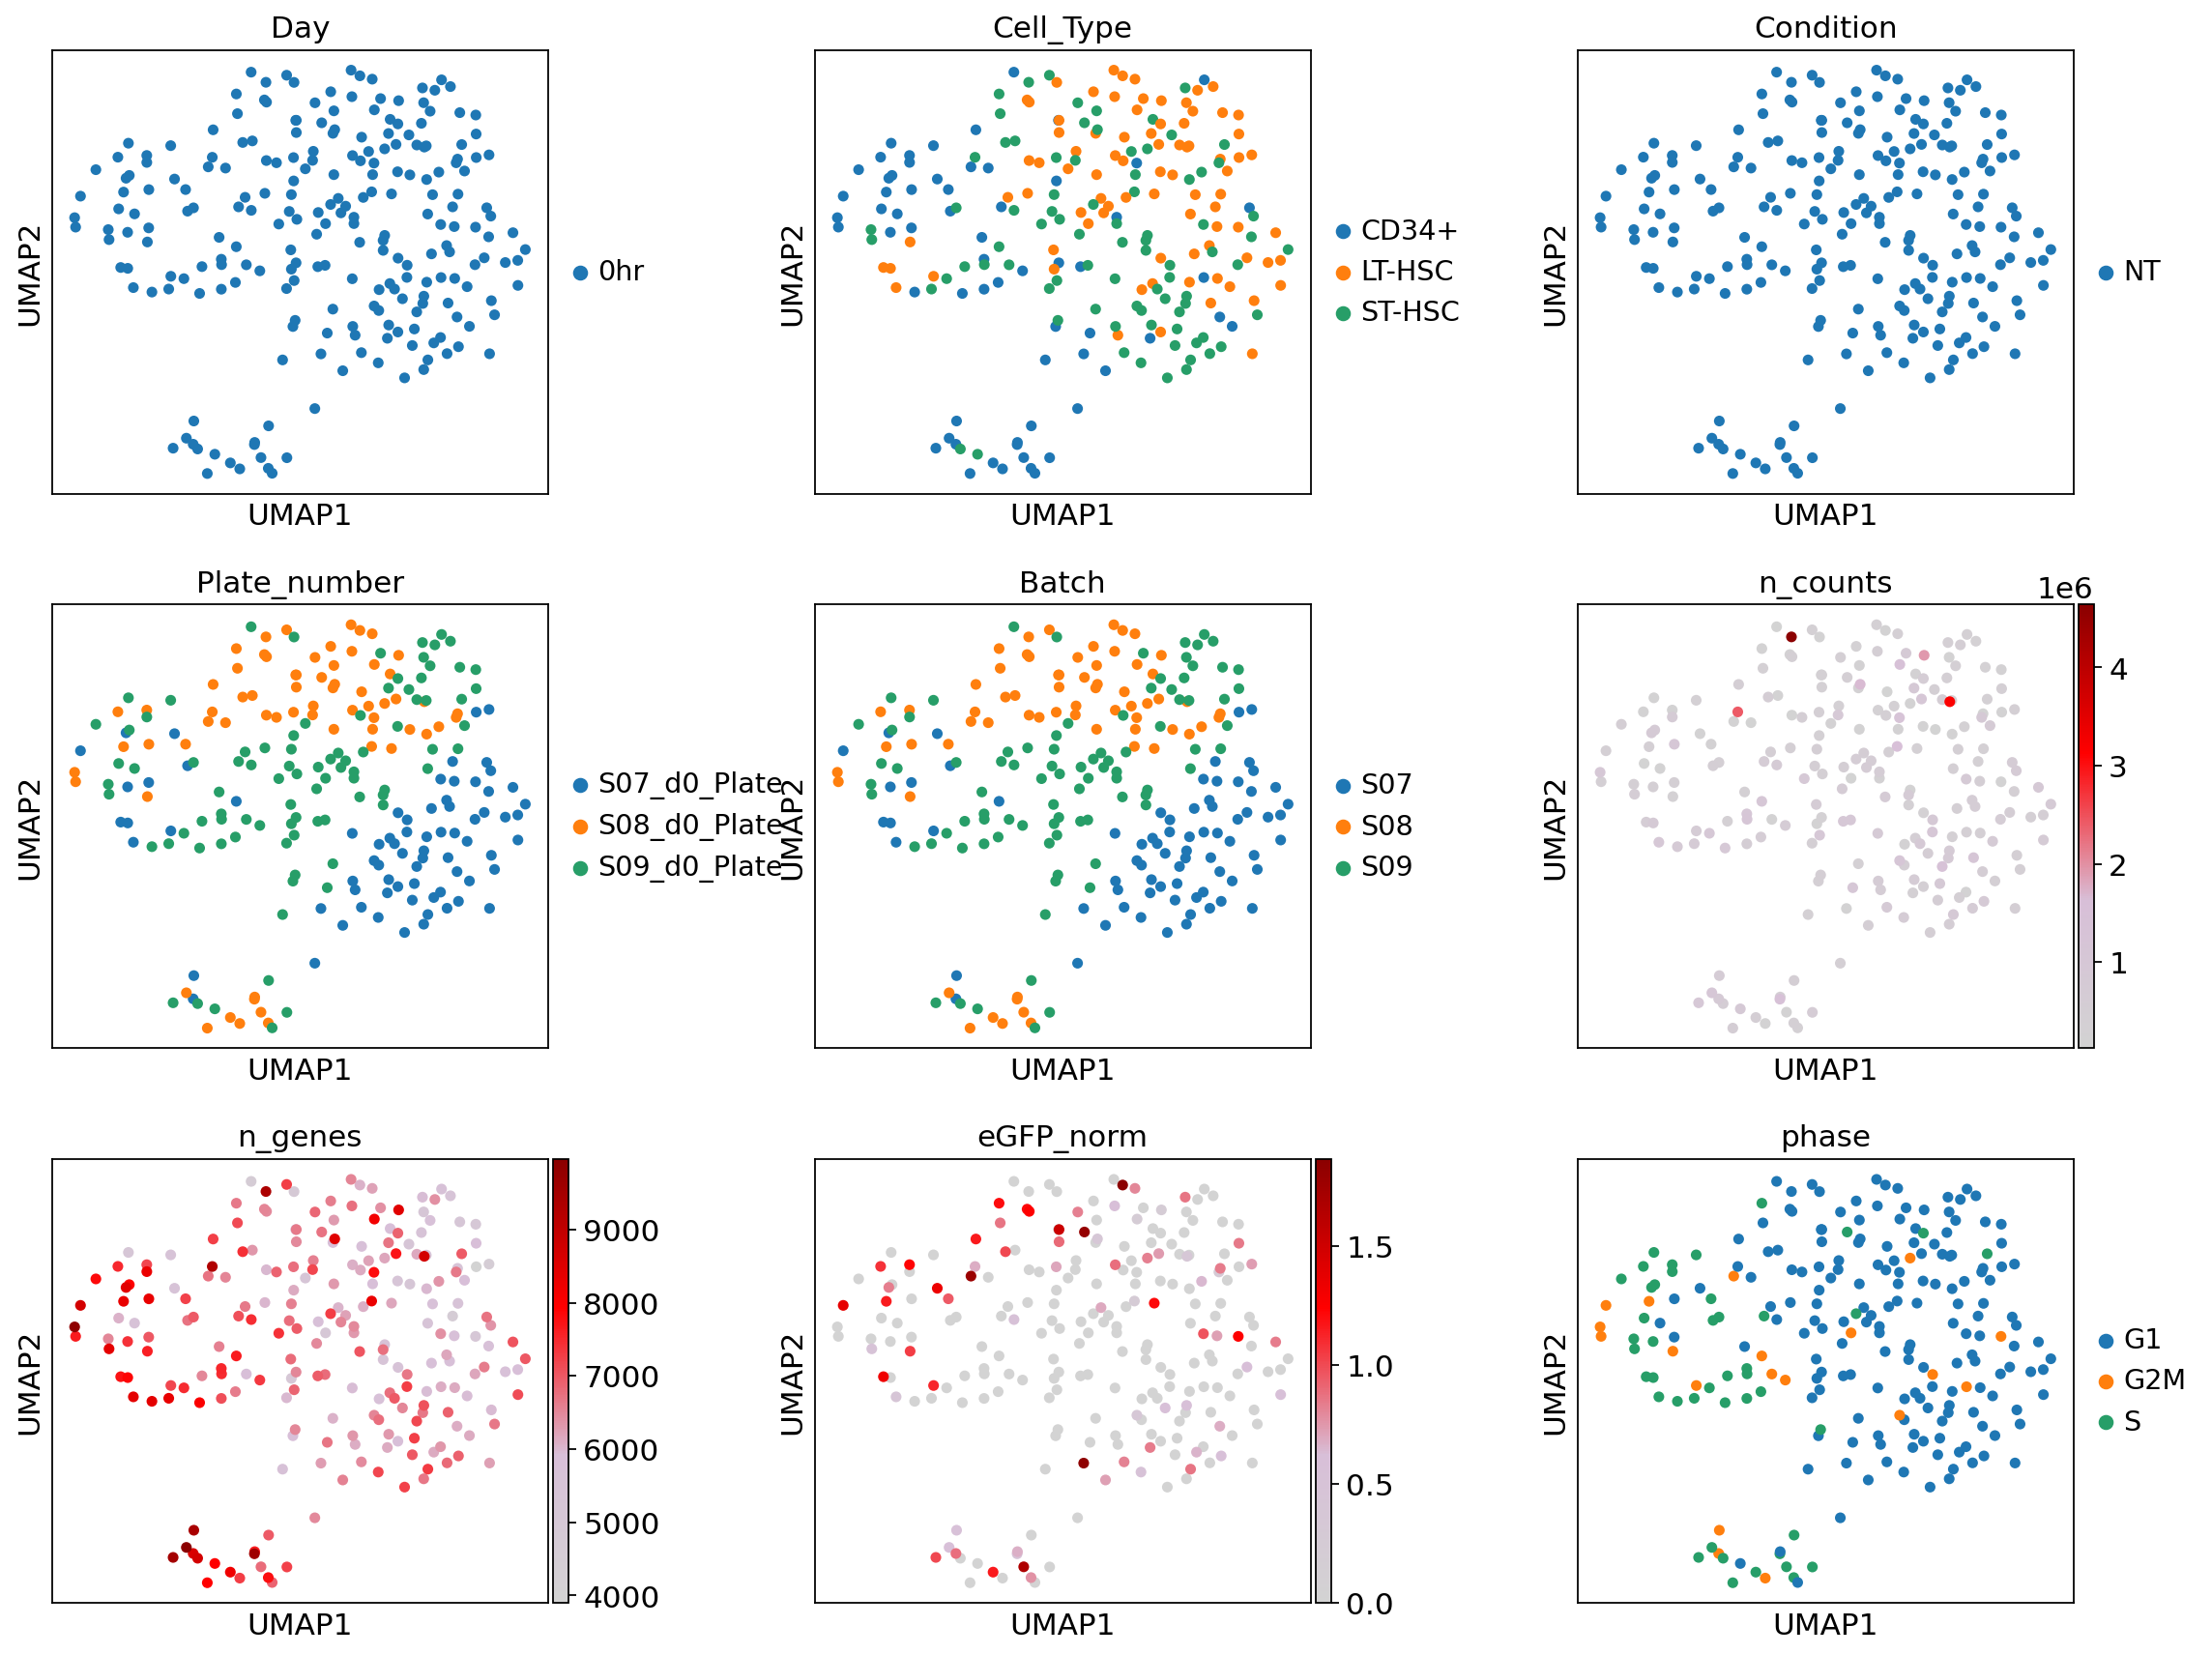

In [19]:
sc.pl.umap(adata, color=main_keys,s=100, wspace=0.4, ncols=3, color_map=cmap, save='_BM789_Day0.pdf')

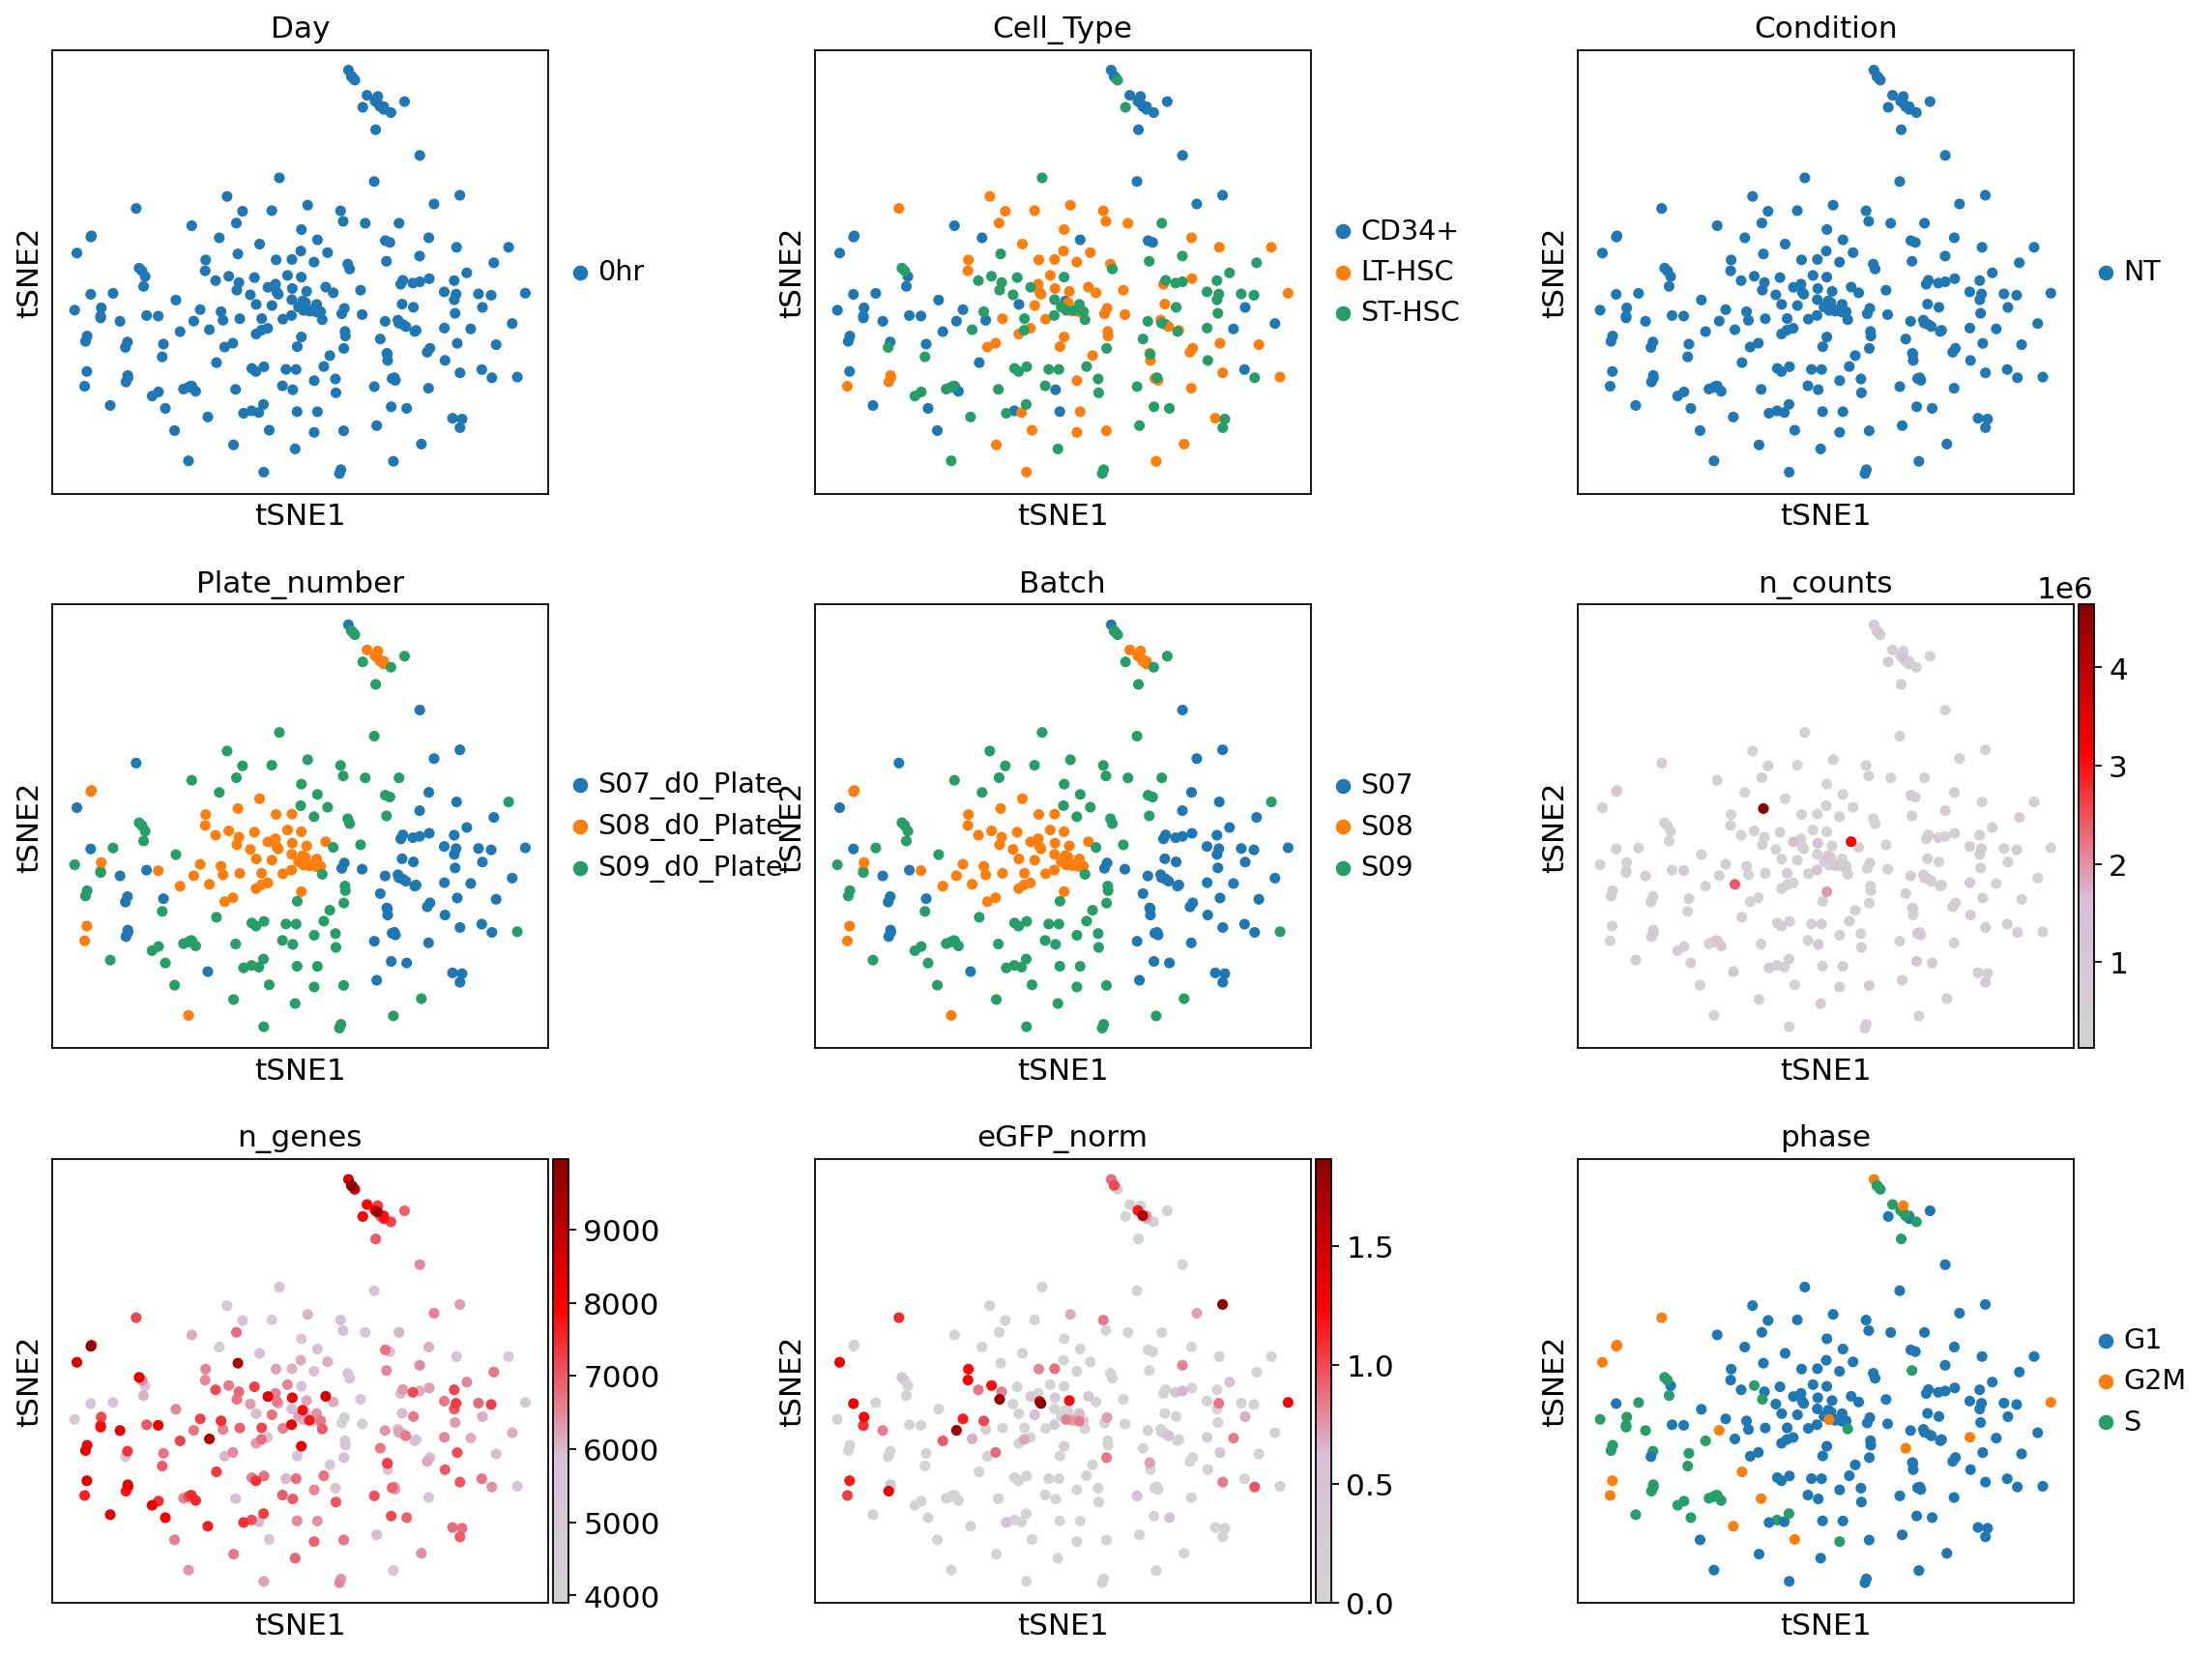

In [20]:
sc.pl.tsne(adata, color=main_keys, s=100, wspace=0.4, ncols=3, color_map=cmap, save='_BM789_Day0.pdf')

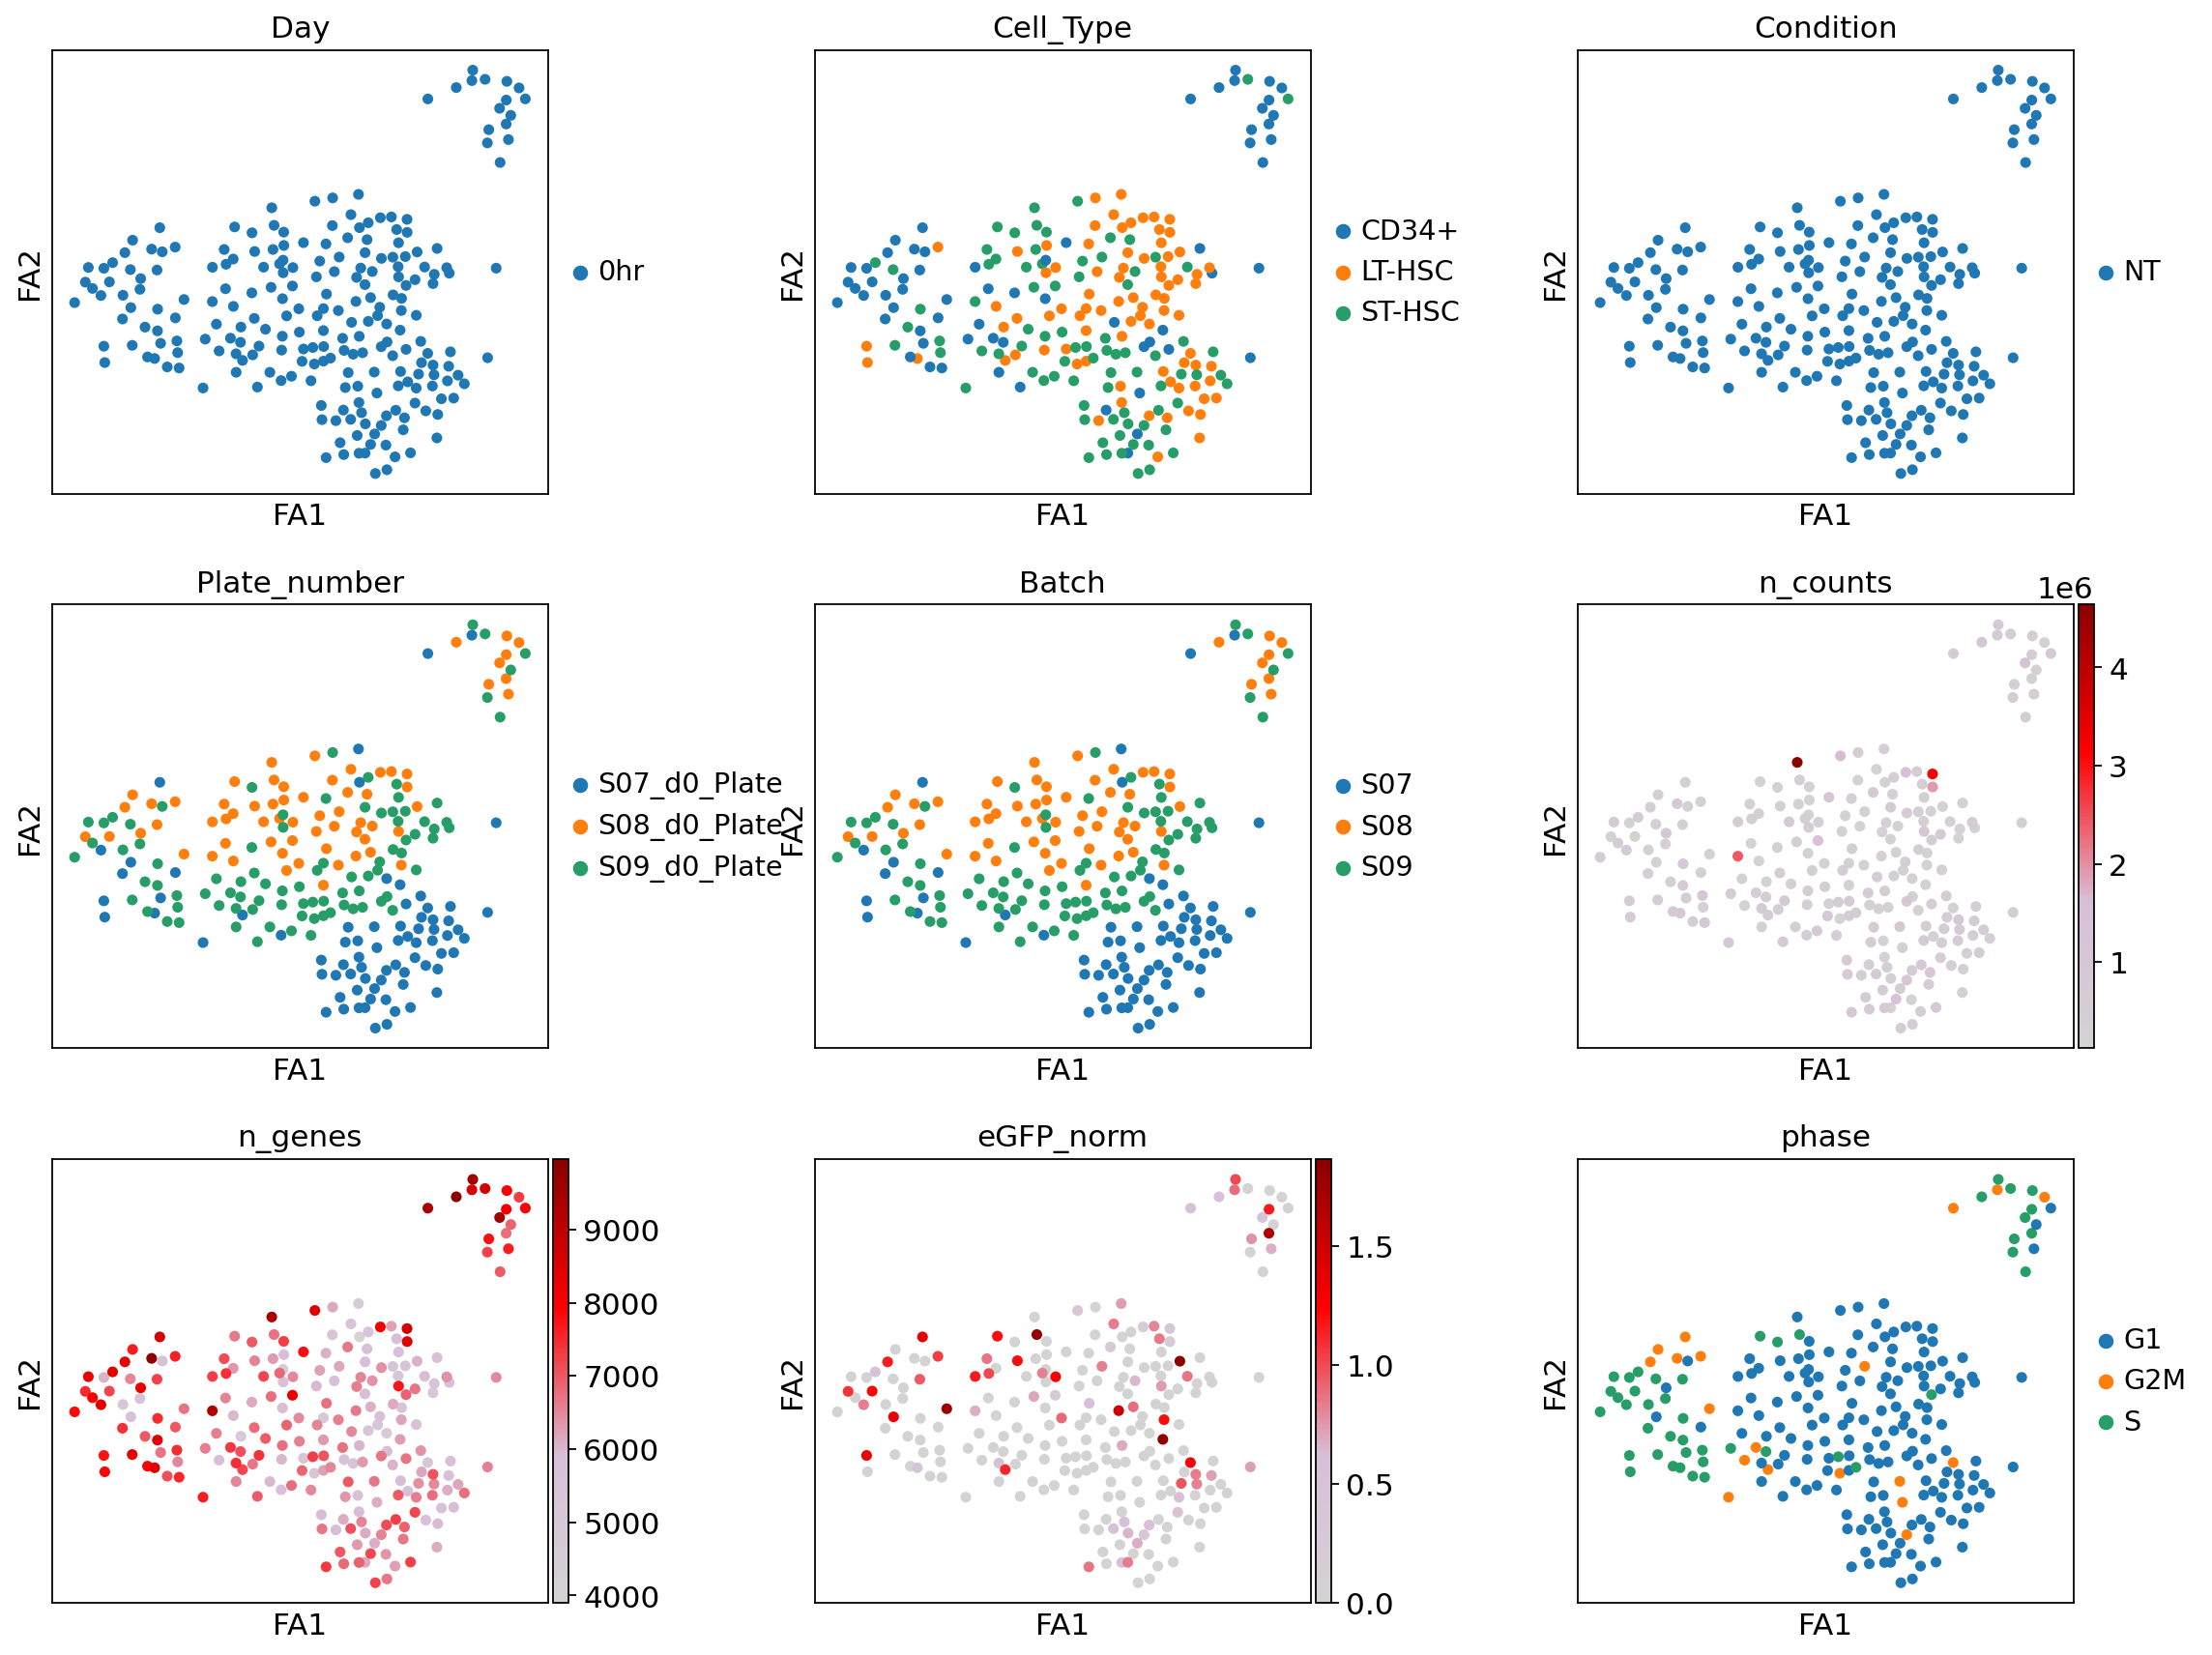

In [21]:
sc.pl.draw_graph(adata, color=main_keys, s=100, wspace=0.4, ncols=3, color_map=cmap, save='_BM789_Day0.pdf')

In [22]:
adata.write('./write/BM789_Day0_processed.h5ad')

# Regress out n_genes

MeanForFit:  10
7813
Length of HVGs: 2394
regressing out ['n_genes']


/home/xw251/miniconda3/envs/scanpy_py368/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:278: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  DomainWarning)


    finished (0:00:06)
computing PCA with n_comps = 50
    finished (0:00:00)


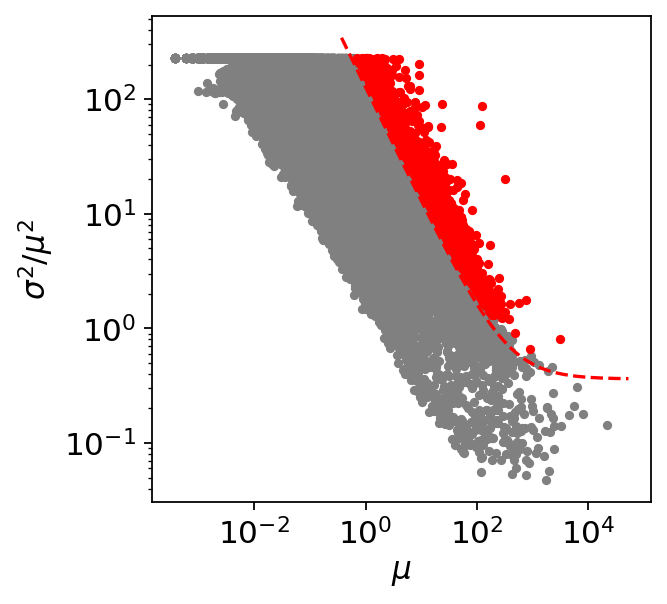

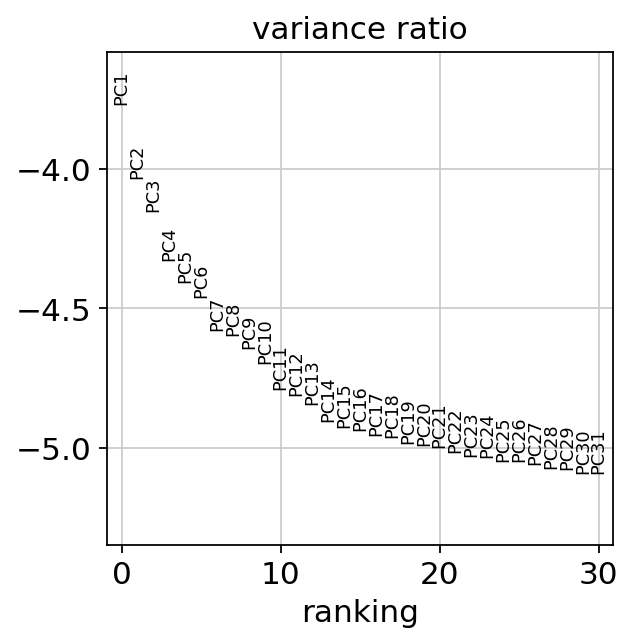

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
computing tSNE
    using 'X_pca' with n_pcs = 50
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:01)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:00)


In [23]:
adata = sc.read('./write/BM789_Day0_lognorm_afterQC.h5ad')

smqpp.tech_var(adata, useERCC=False, meanForFit=10) 
smqpp.plot_tech_var(adata)
adata = adata[:,adata.uns['varGenes']['genes']['highVar']].copy()
sc.pp.regress_out(adata, ['n_genes'])
sc.pp.scale(adata)

sc.tl.pca(adata,svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)
sc.tl.tsne(adata)
sc.tl.draw_graph(adata)

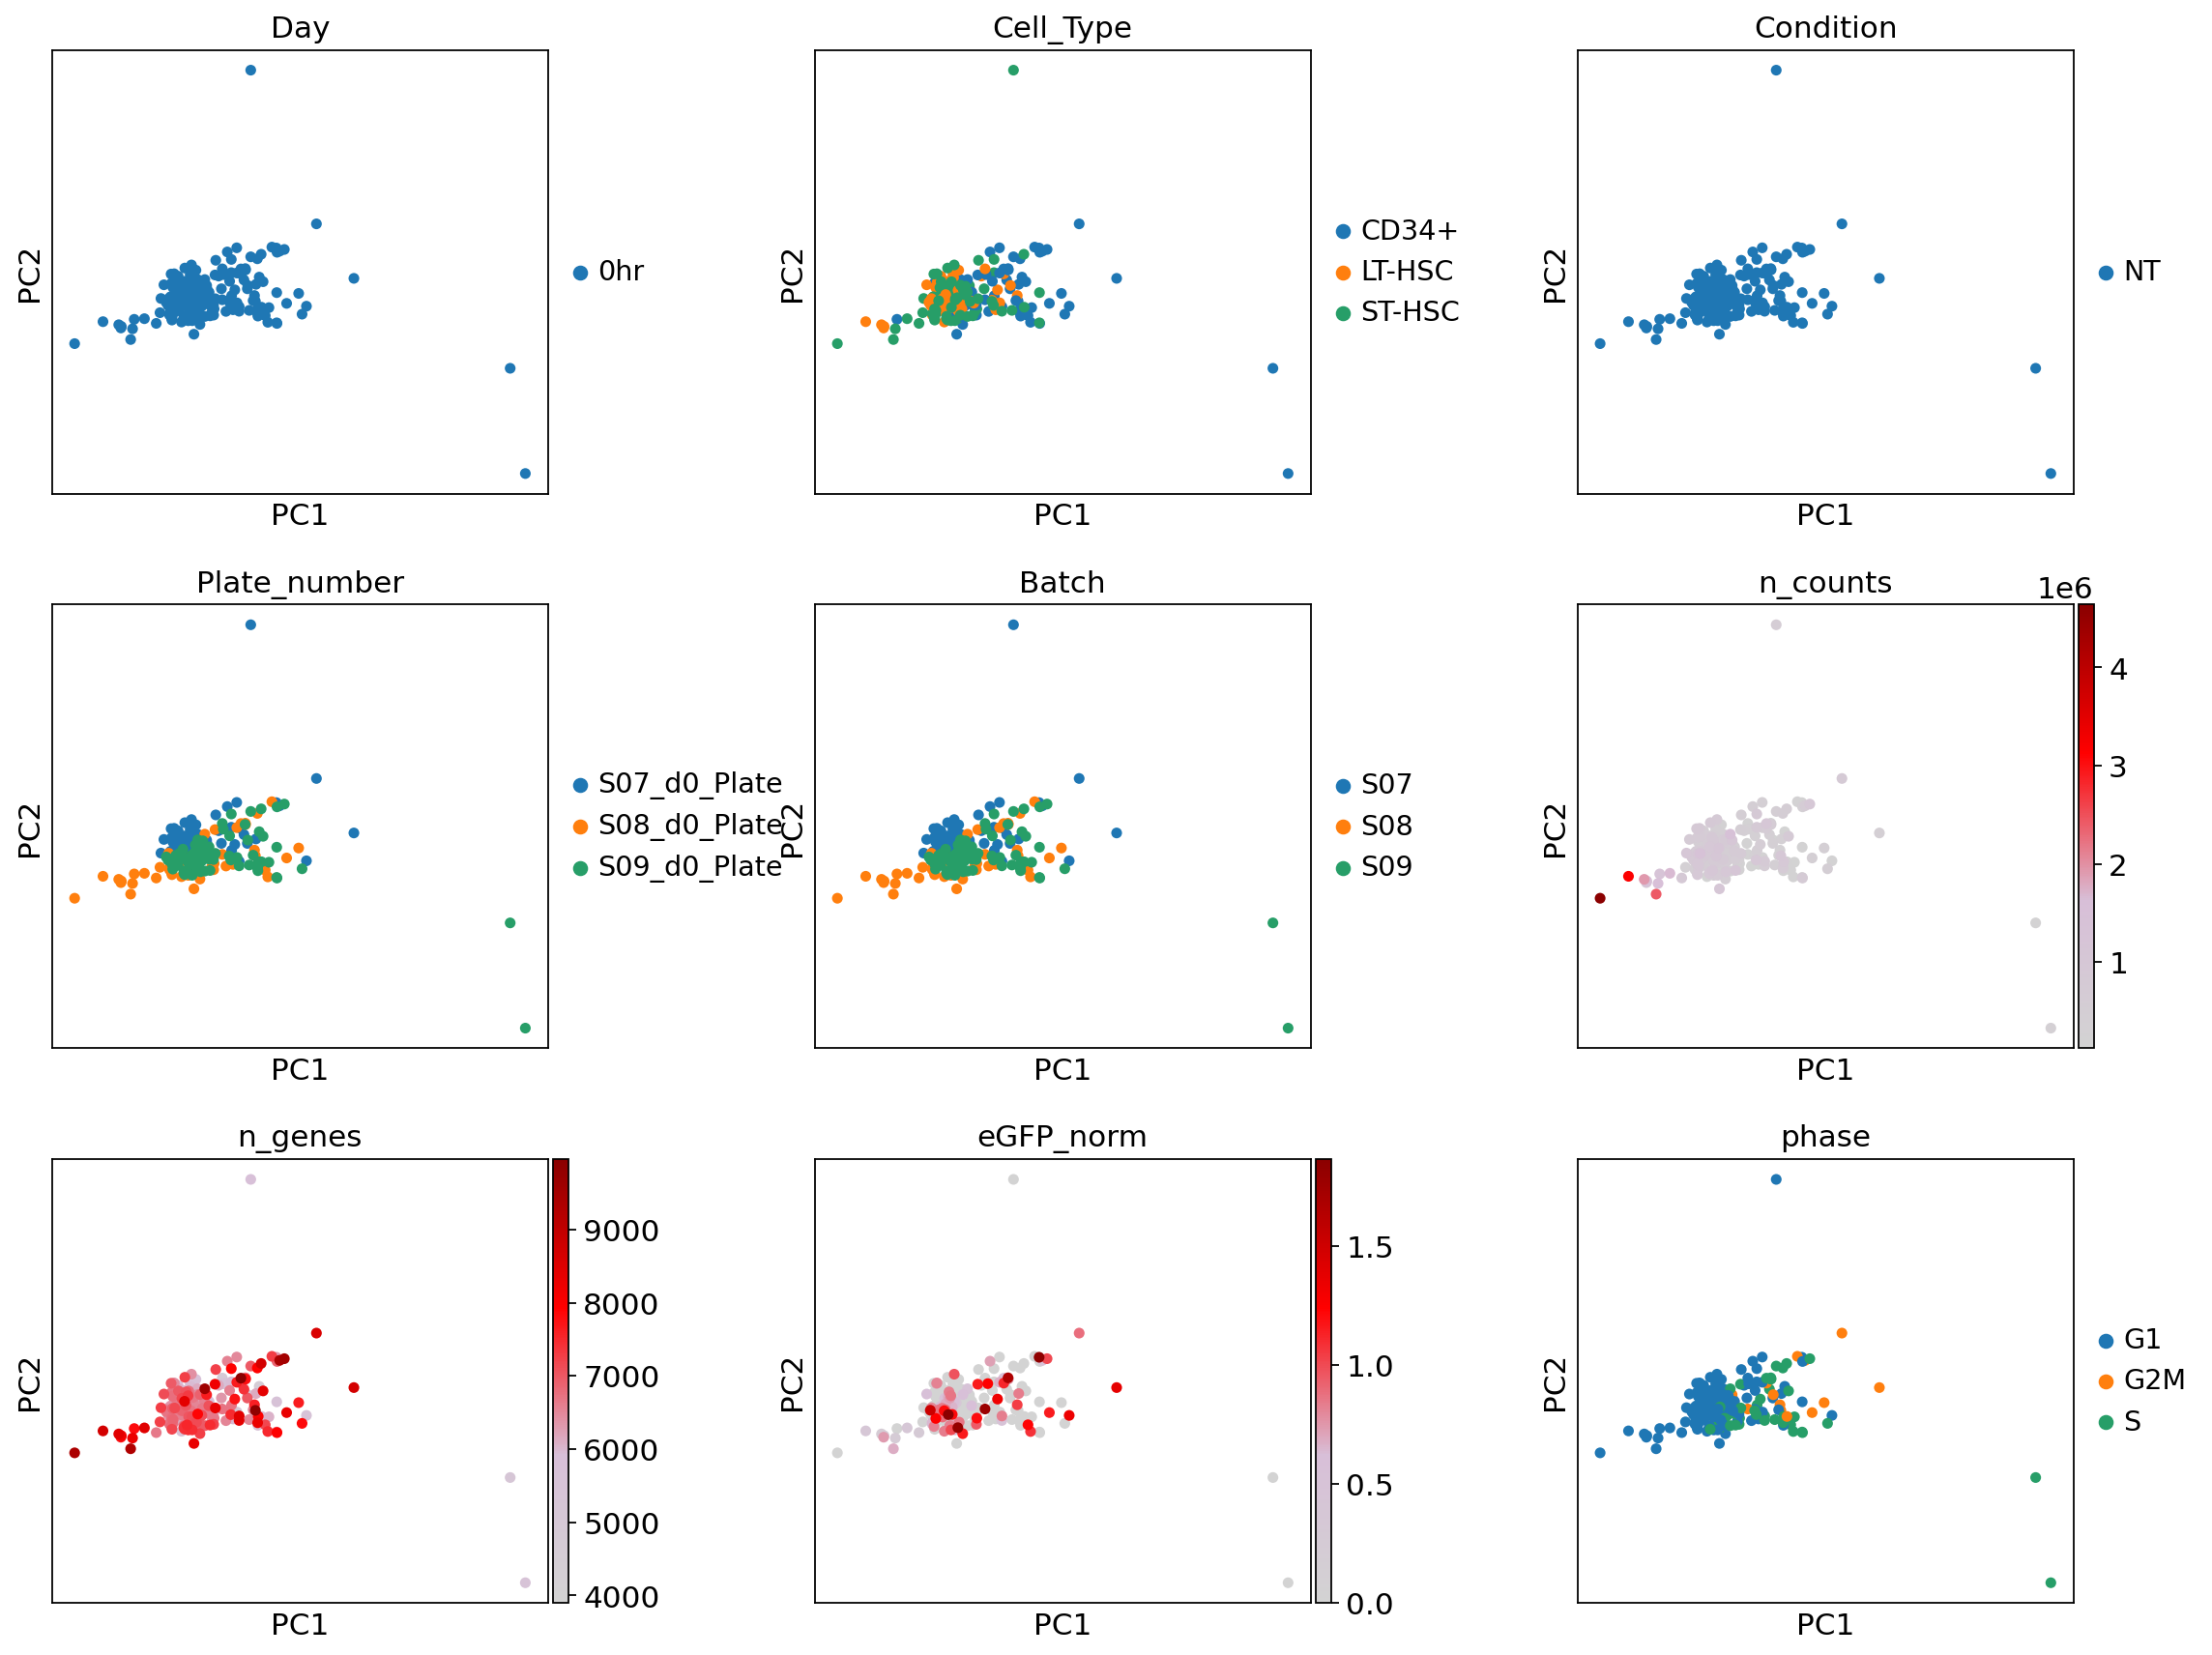

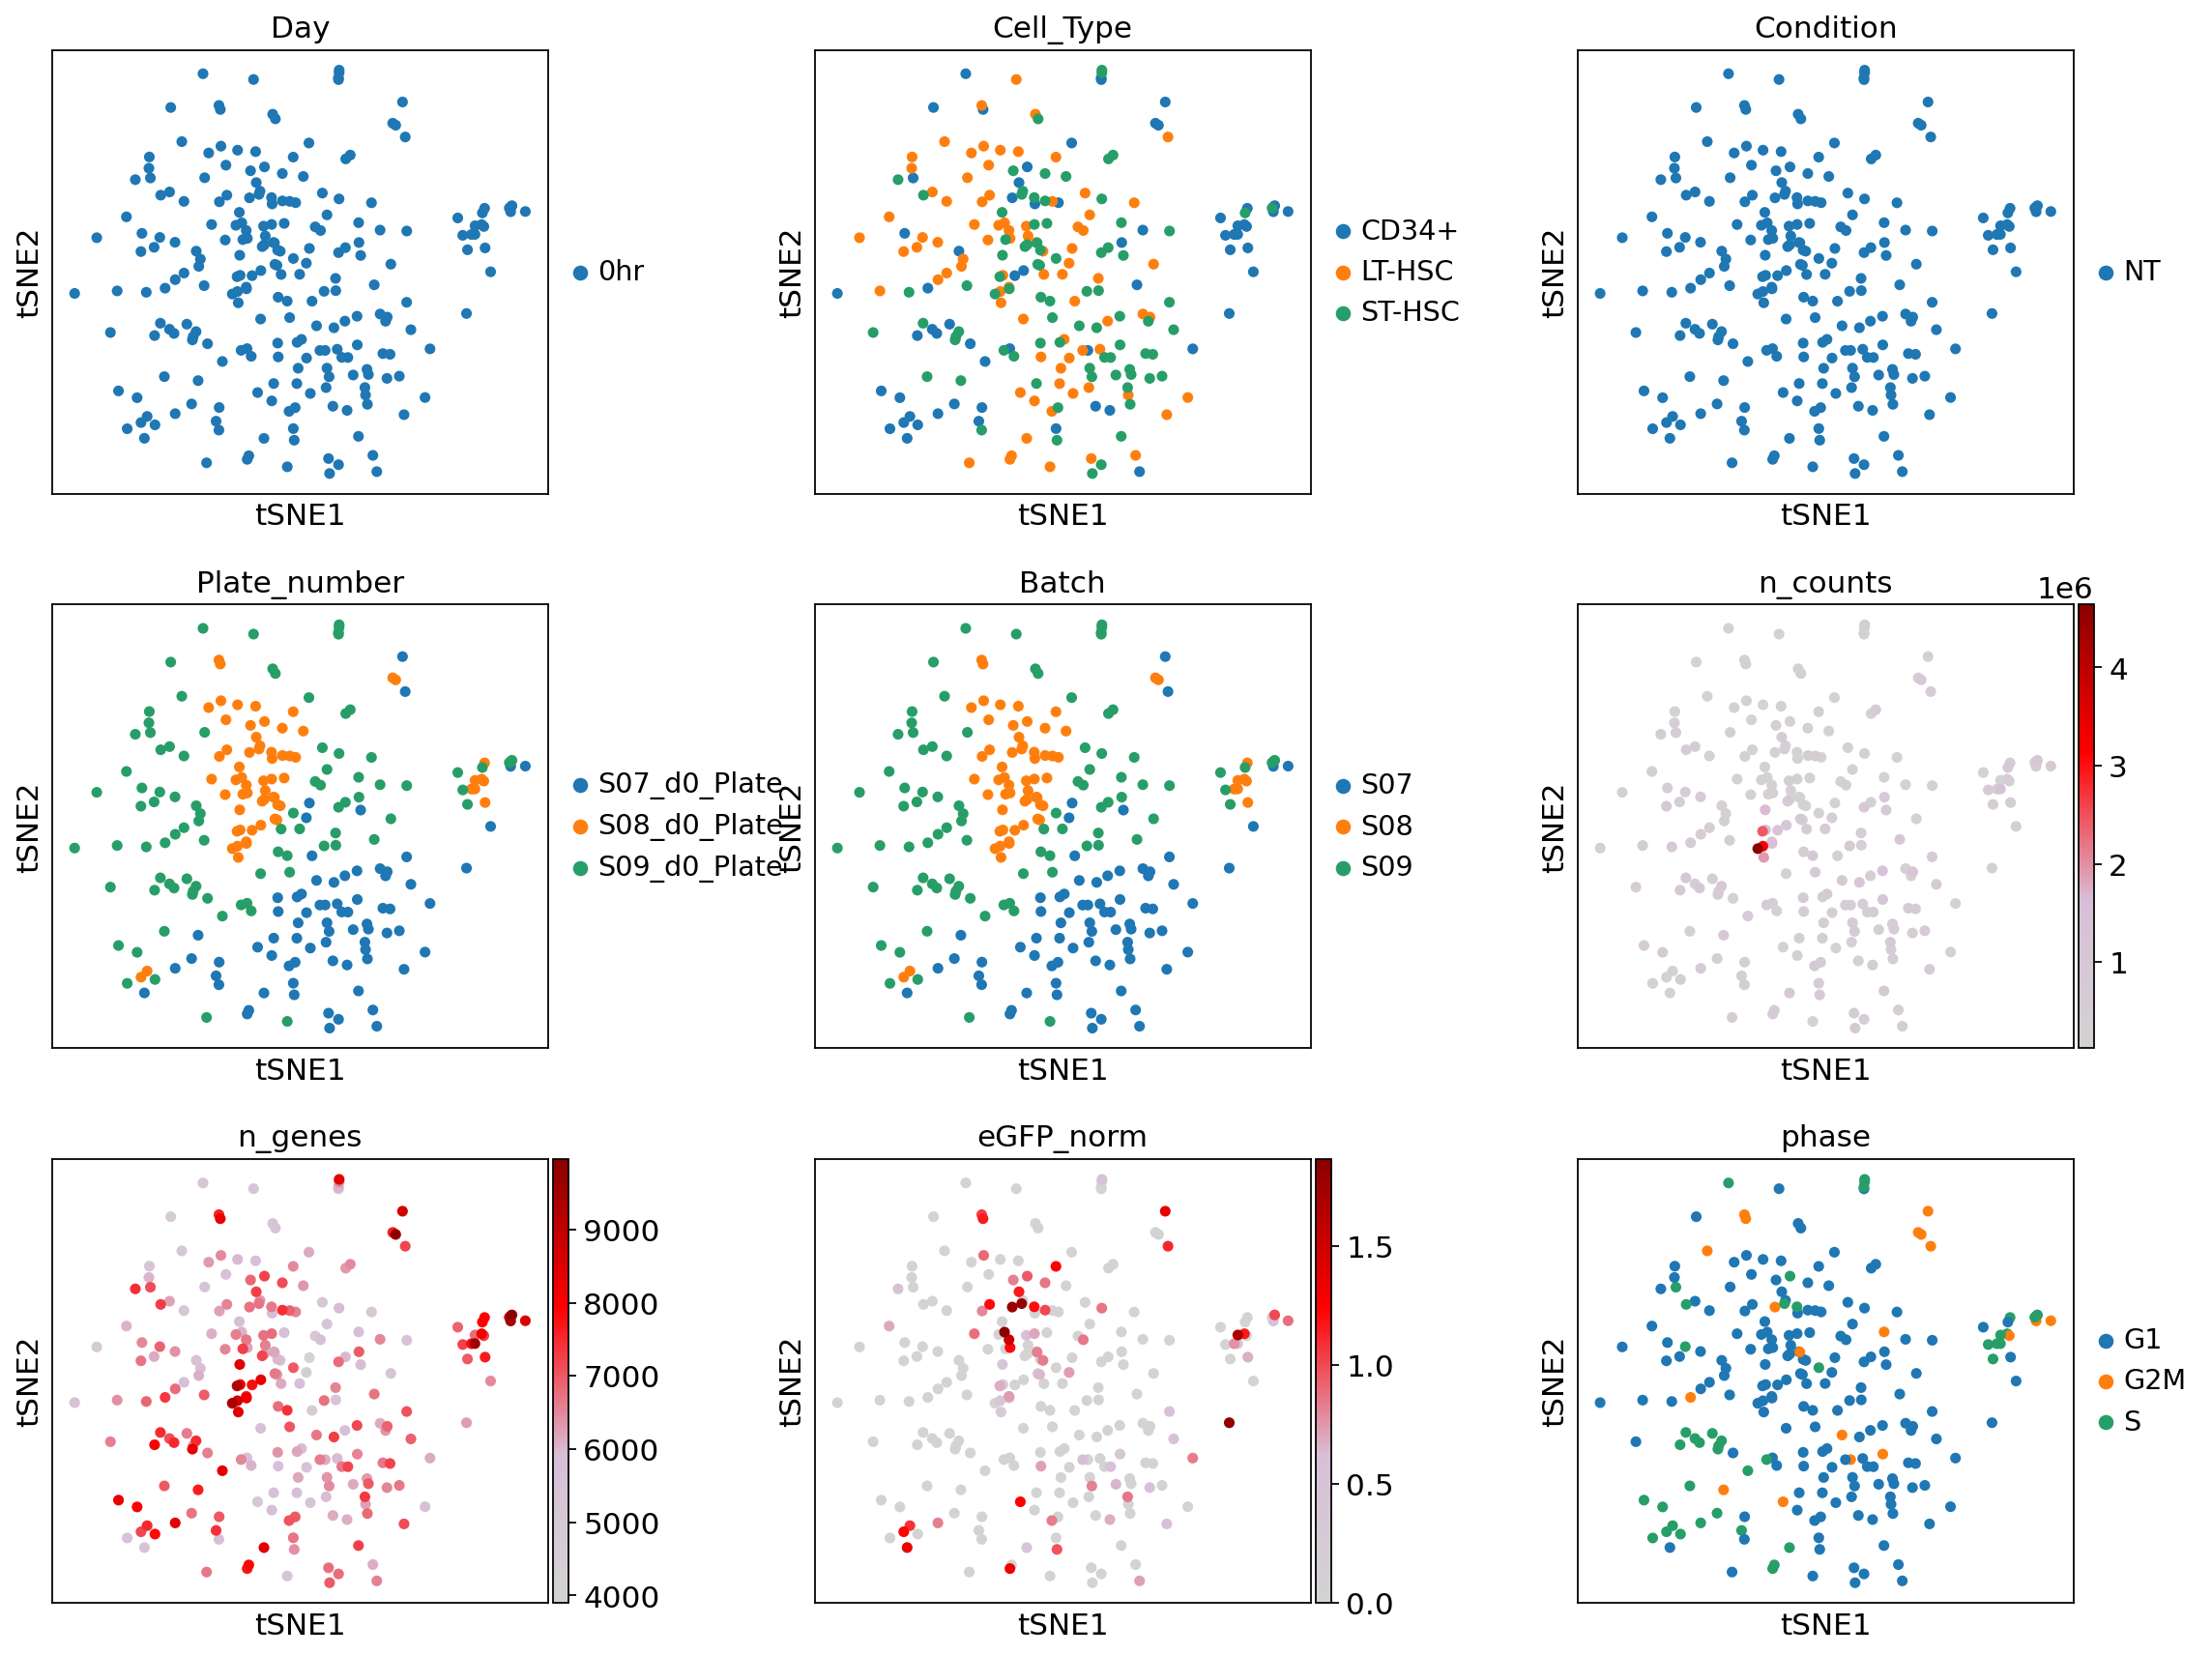

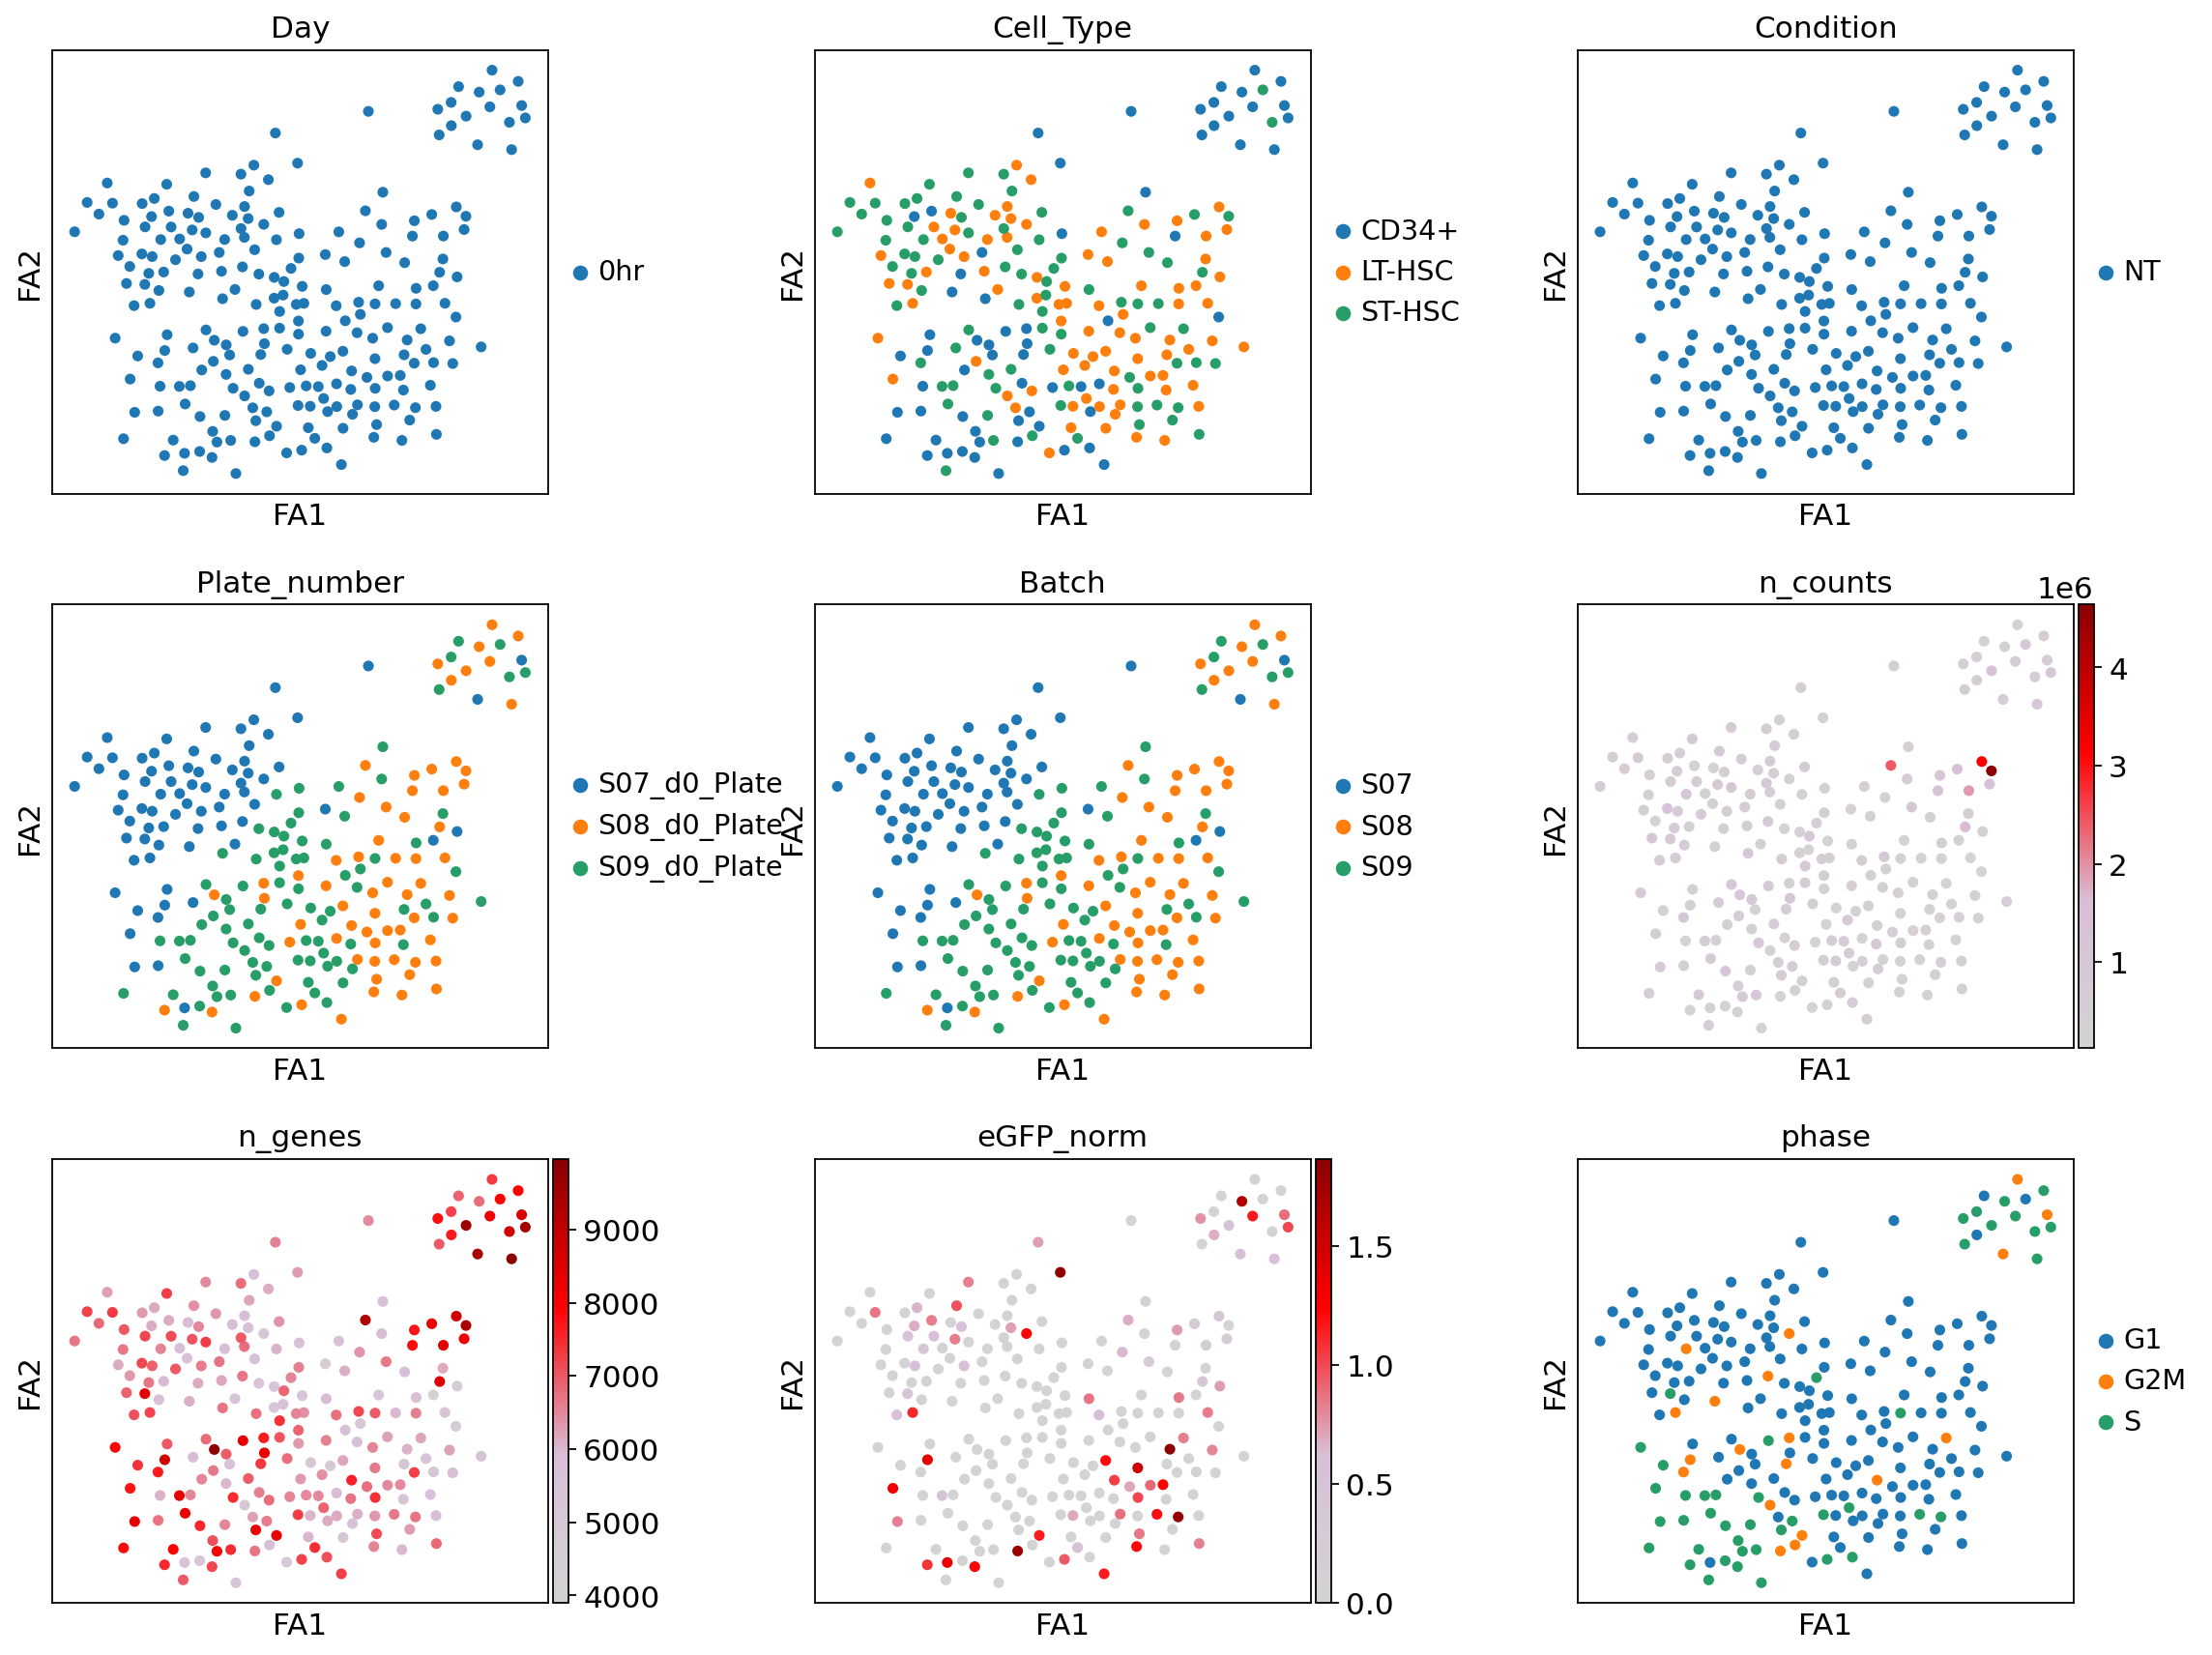

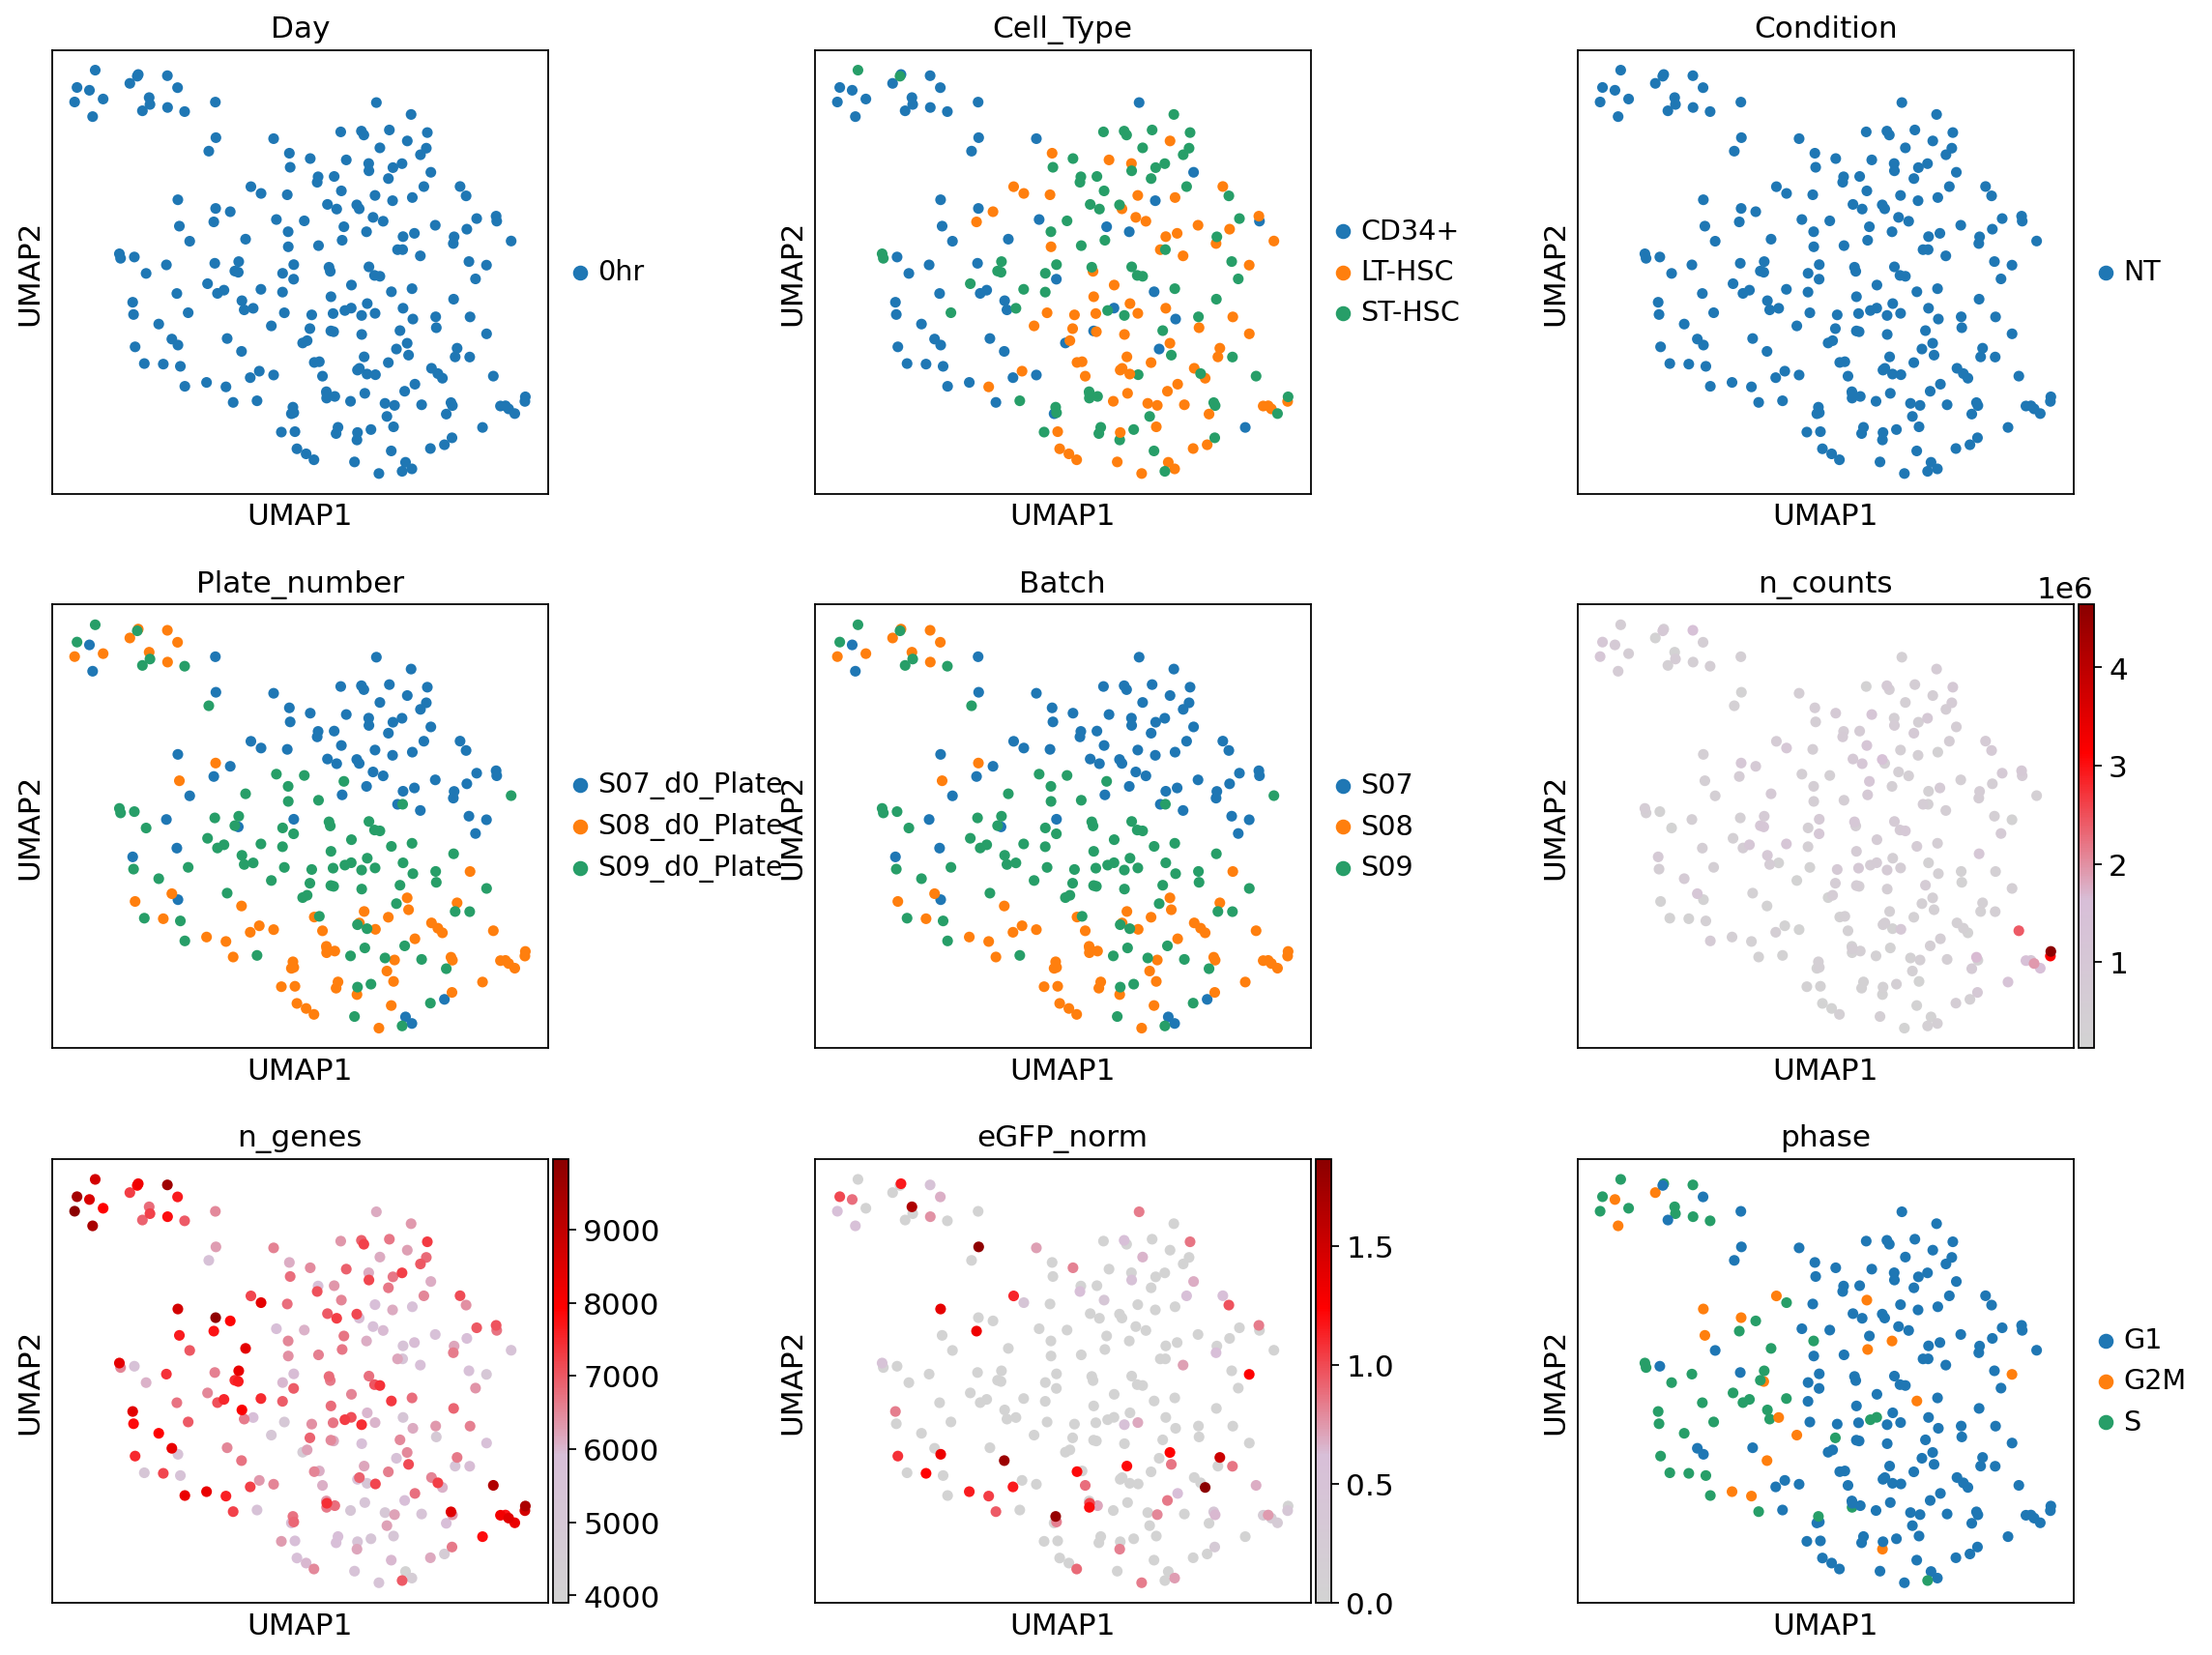

In [24]:
sc.pl.pca_scatter(adata, color=main_keys,s=100, wspace=0.4, ncols=3, color_map=cmap, save='_BM789_Day0_regressout_ngenes.pdf')
sc.pl.tsne(adata, color=main_keys,s=100, wspace=0.4, ncols=3, color_map=cmap, save='_BM789_Day0_regressout_ngenes.pdf')
sc.pl.draw_graph(adata, color=main_keys,s=100, wspace=0.4, ncols=3, color_map=cmap, save='_BM789_Day0_regressout_ngenes.pdf')
sc.pl.umap(adata, color=main_keys,s=100, wspace=0.4, ncols=3, color_map=cmap, save='_BM789_Day0_regressout_ngenes.pdf')

In [25]:
adata.write('./write/BM789_Day0_processed_regressout_ngene.h5ad')

# Remove batch effect using fastMNN

In [83]:
adata = sc.read('./write/BM789_Day0_processed_regressout_ngene.h5ad')

In [85]:
X_pca = adata.obsm['X_pca']
idx0 = adata.obs['batch'] == '0'
idx1 = adata.obs['batch'] == '1'
idx2 = adata.obs['batch'] == '2'
pca0 = pd.DataFrame(X_pca[idx0])
pca1 = pd.DataFrame(X_pca[idx1])
pca2 = pd.DataFrame(X_pca[idx2])

In [86]:
%reload_ext rpy2.ipython

In [87]:
%%R -i pca0 -i pca1 -i pca2 -o odf
suppressMessages(library("batchelor"))
odf = reducedMNN(data.matrix(pca0), data.matrix(pca1), data.matrix(pca2),
                      BPPARAM=MulticoreParam(detectCores()))
odf = data.frame(odf$corrected)

In [89]:
CNs = np.concatenate([adata.obs_names[x] for x in [idx0, idx1, idx2]])
adata = adata[CNs,:].copy()
adata.obsm['X_pca'] = odf.values

In [3]:
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)
sc.tl.draw_graph(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:00)


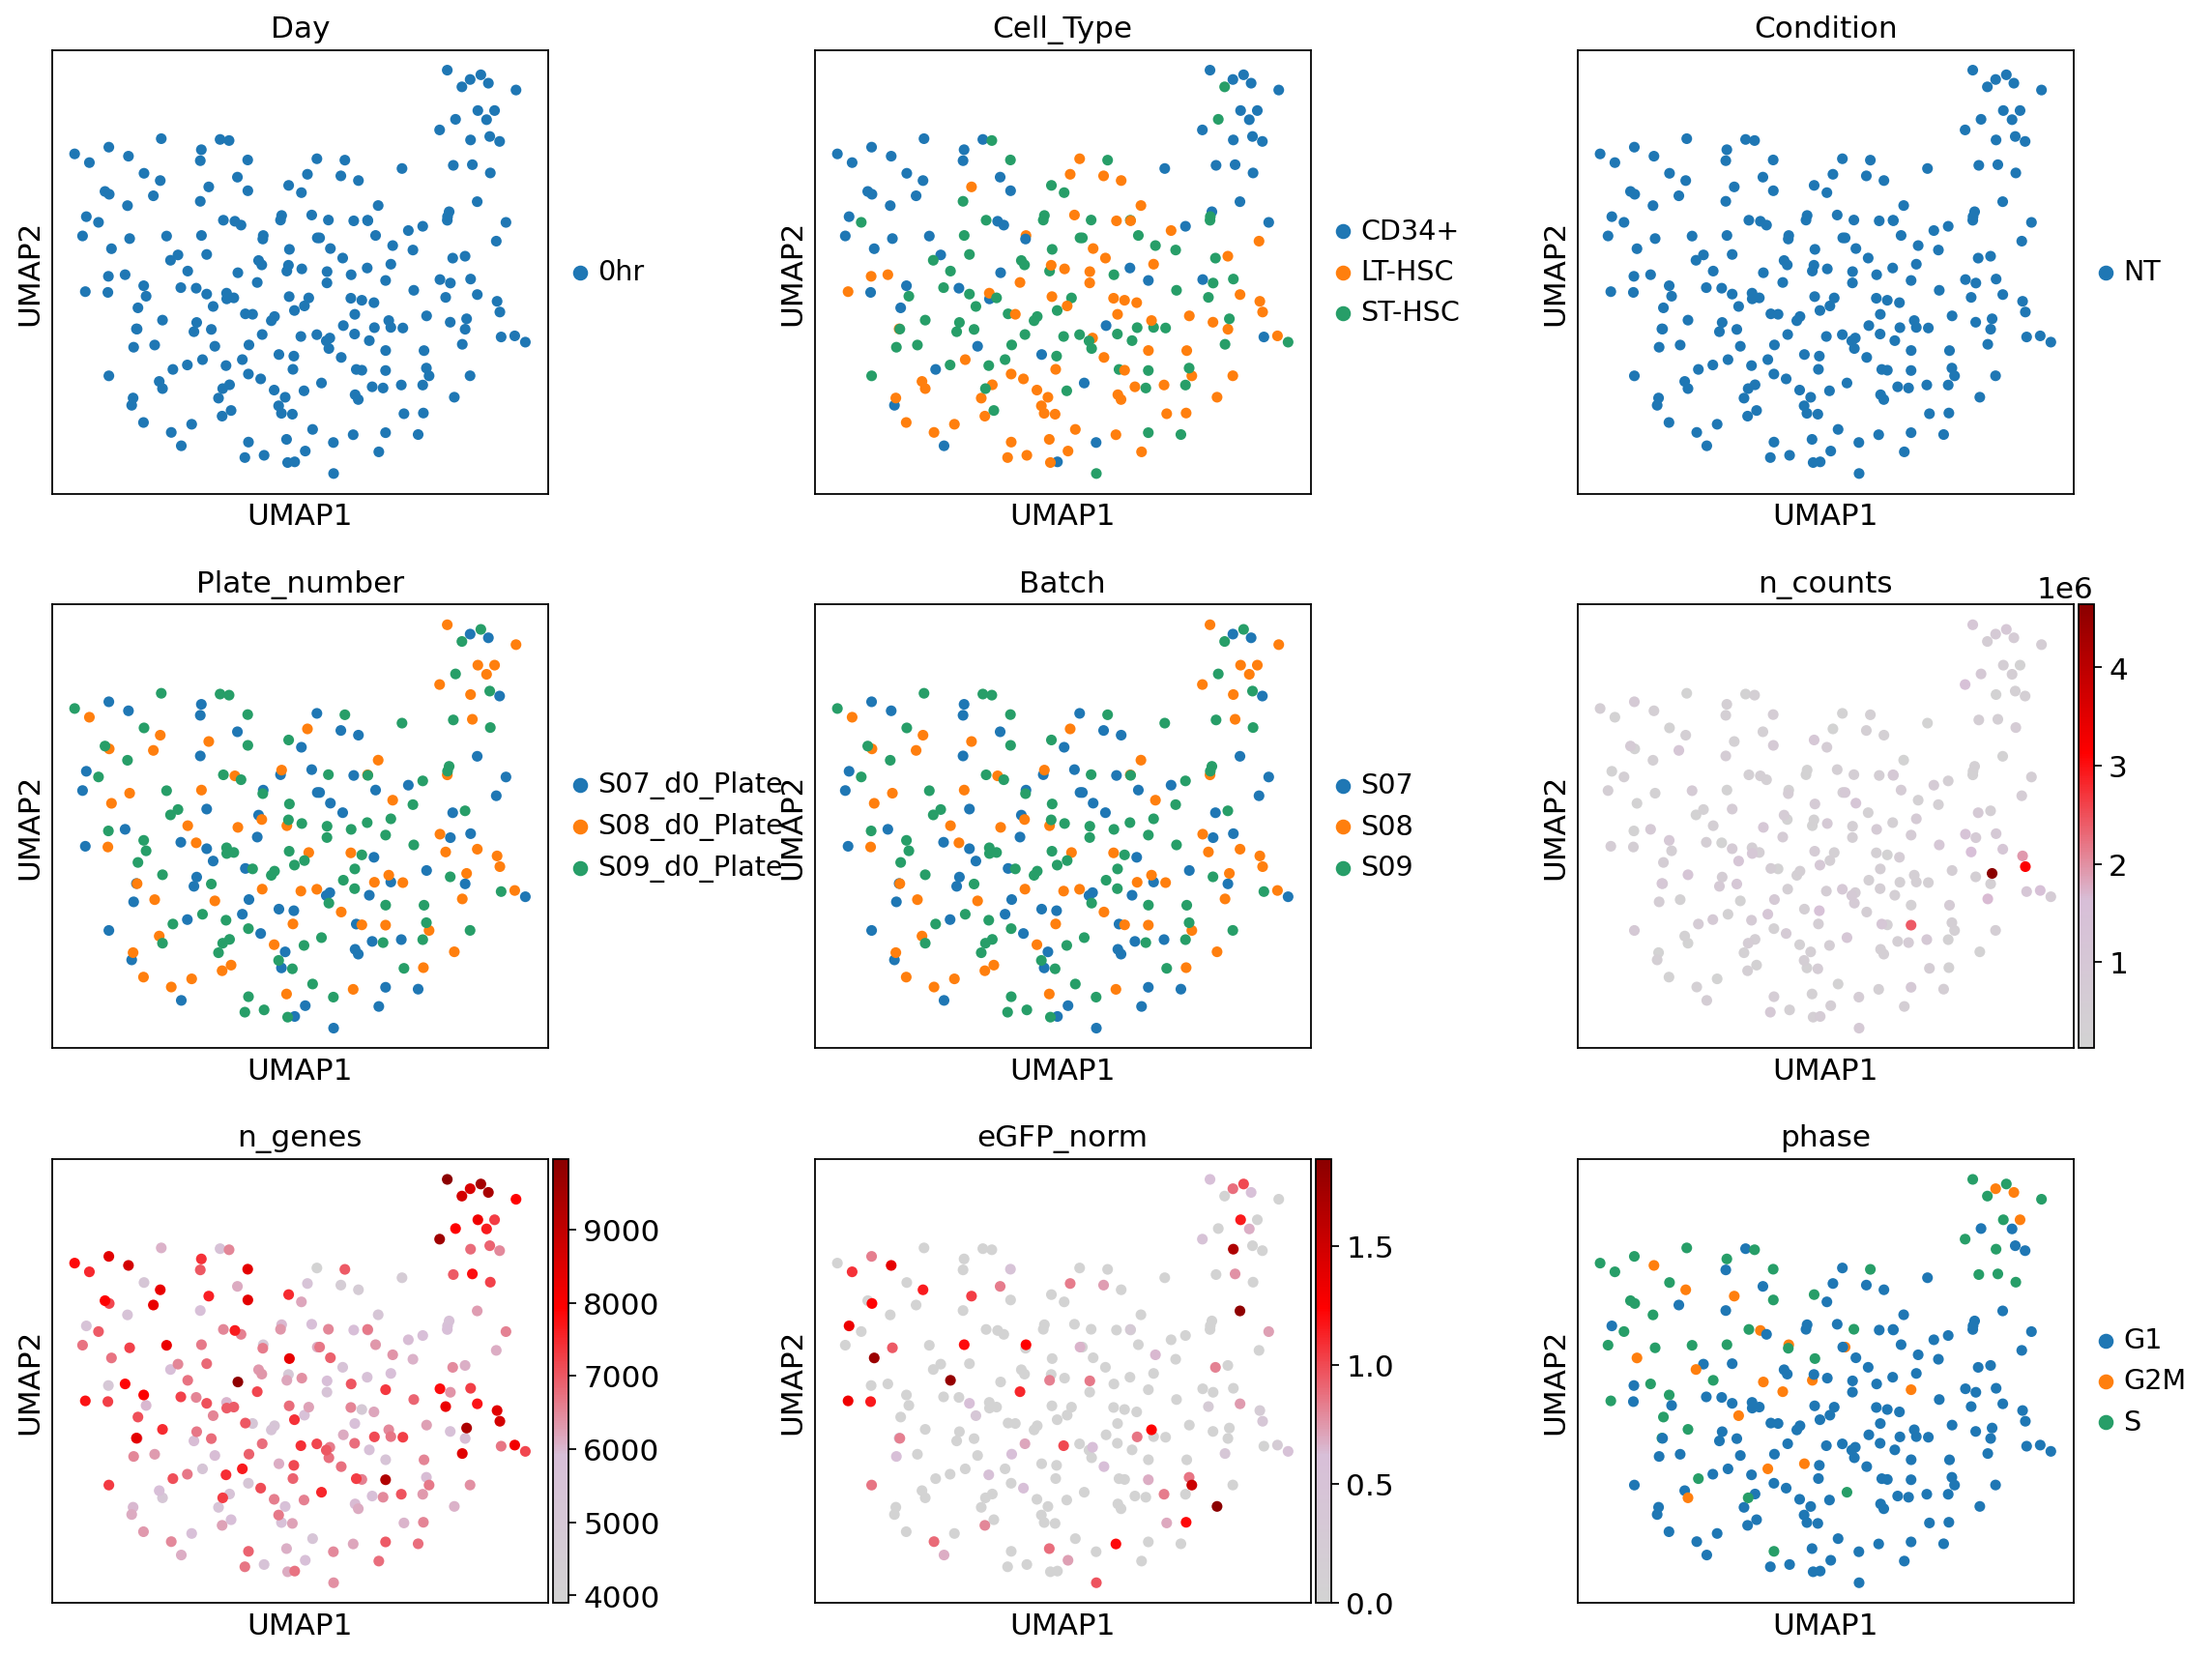

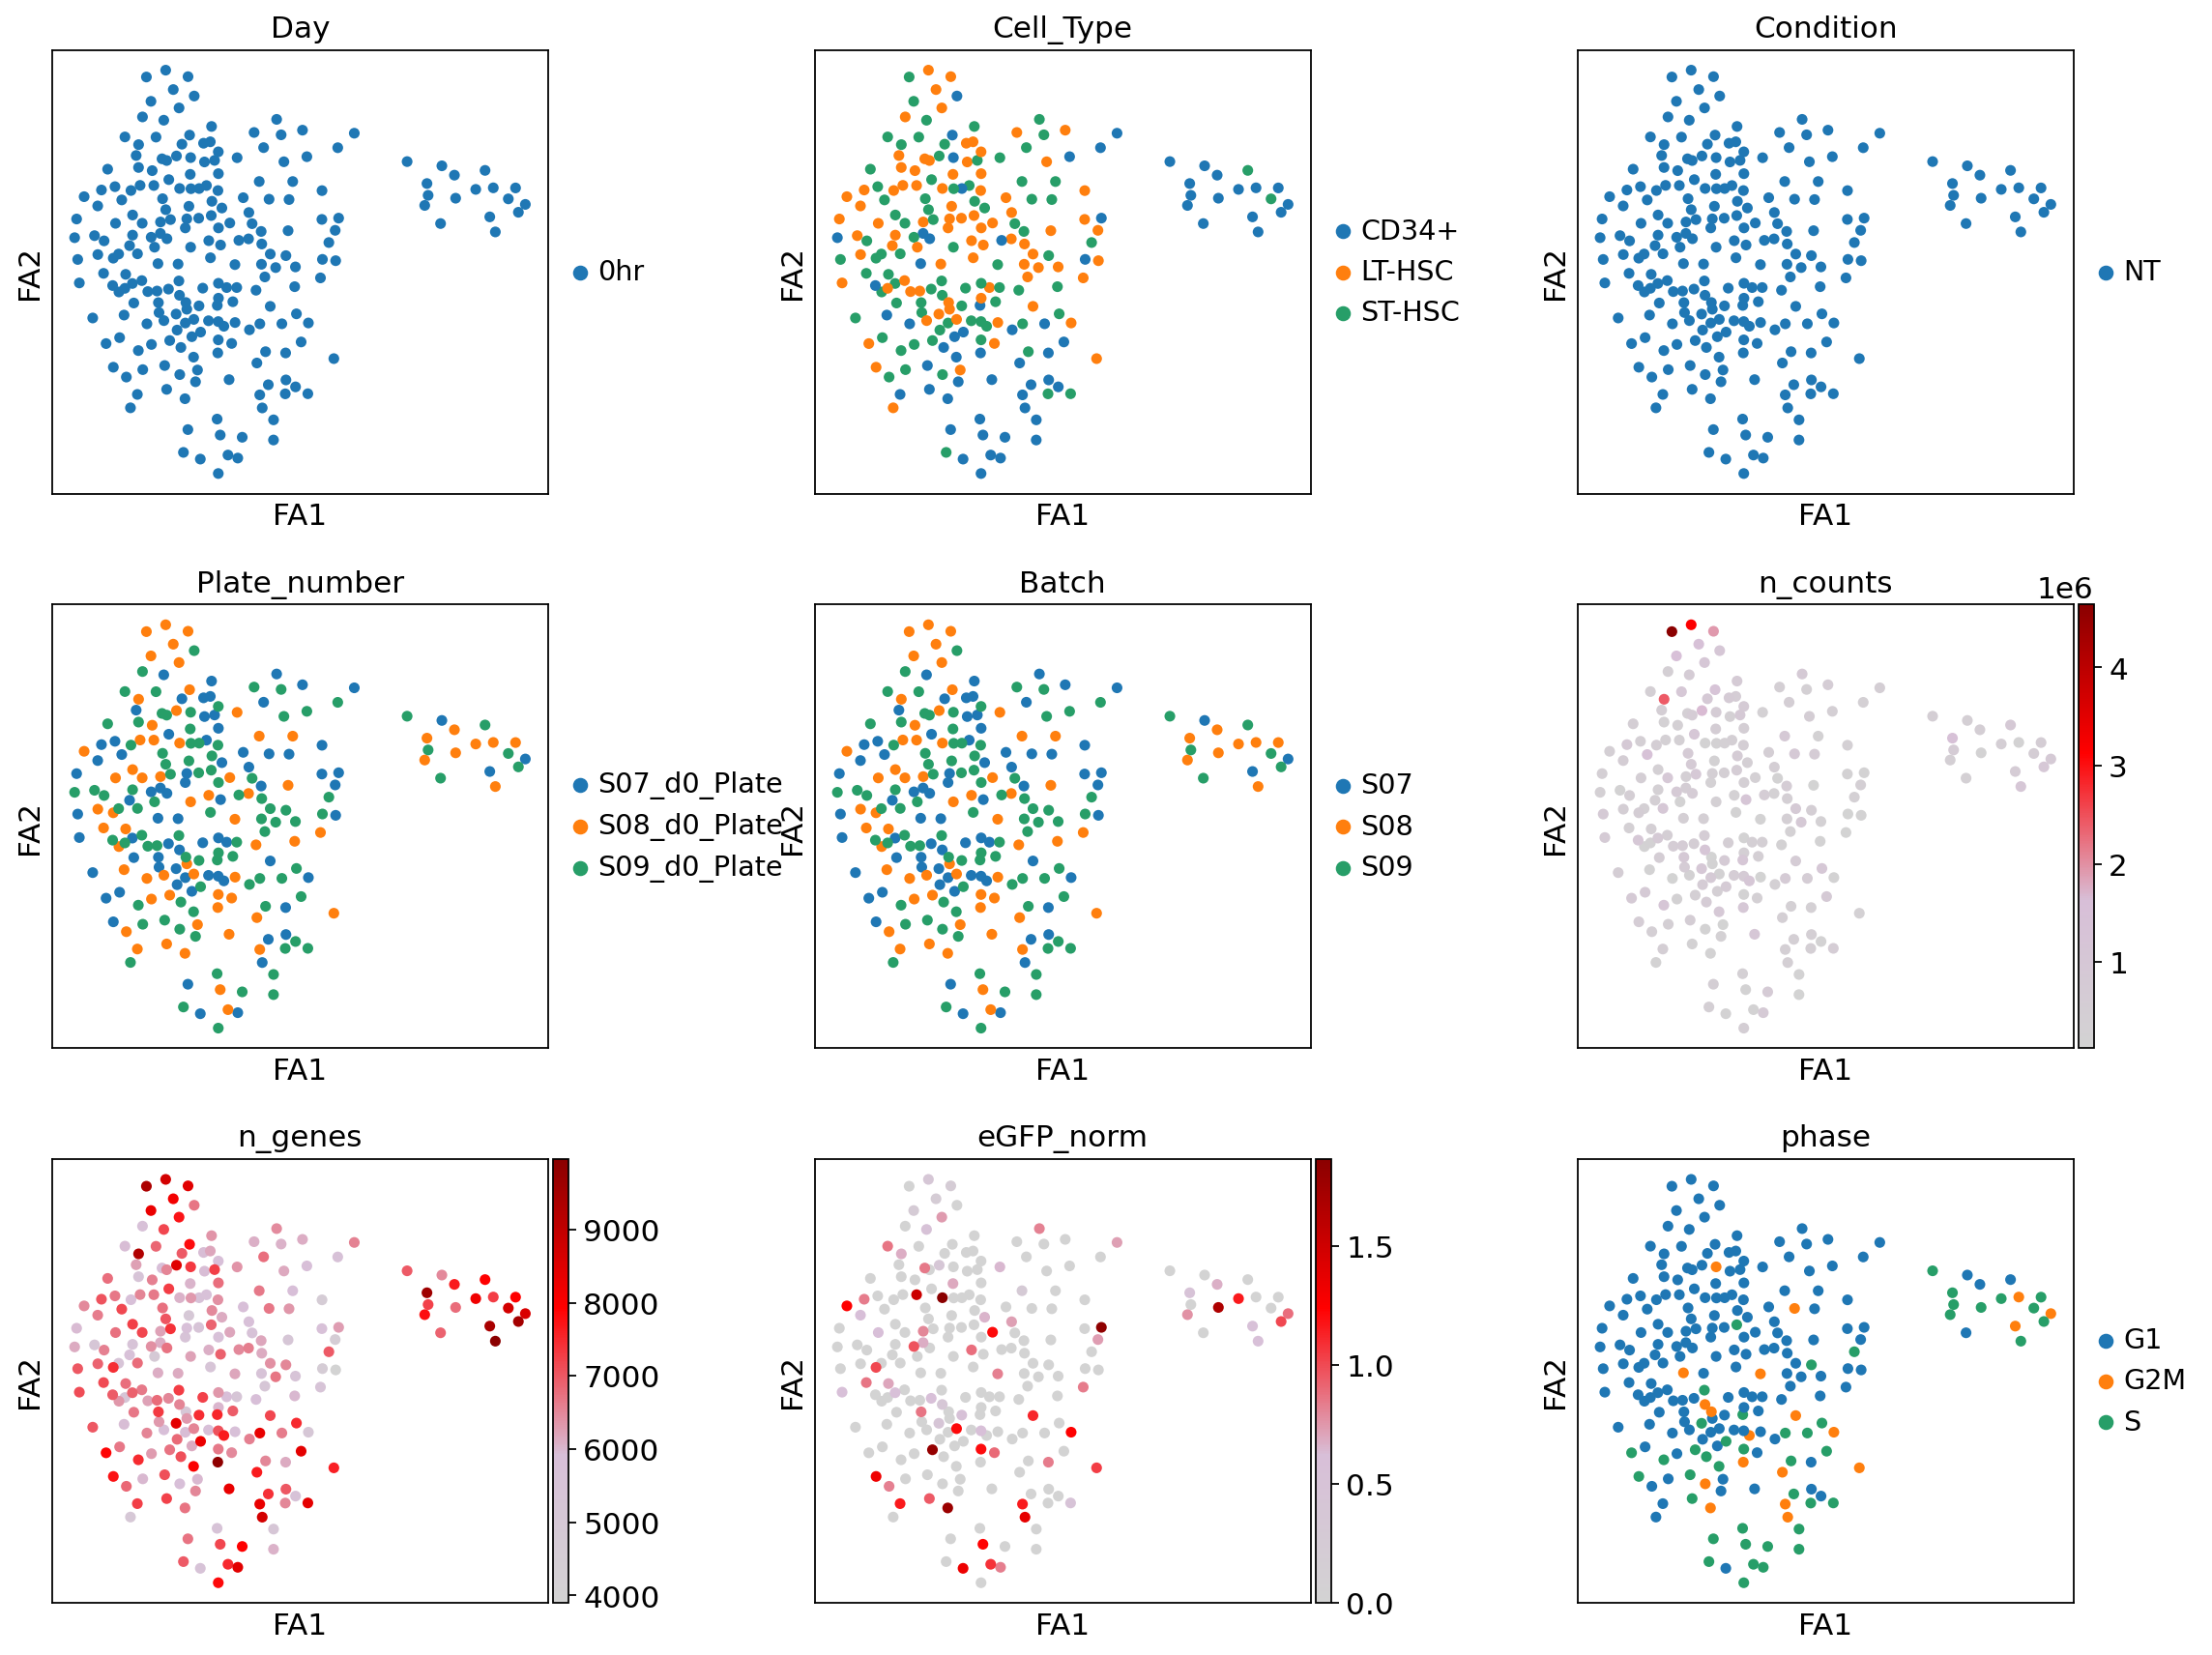

In [5]:
sc.pl.umap(adata, color=main_keys,s=100, wspace=0.4, ncols=3, color_map=cmap, save='_BM789_Day0_regressout_ngenes_BC.pdf')
sc.pl.draw_graph(adata, color=main_keys,s=100, wspace=0.4, ncols=3, color_map=cmap, save='_BM789_Day0_regressout_ngenes_BC.pdf')

In [92]:
adata.write('./write/BM789_Day0_processed_regressout_ngene_BC.h5ad')

# Project on CB data

In [2]:
adata = sc.read('./write/BM789_Day0_processed_regressout_ngene_BC.h5ad')

In [3]:
CBdata = sc.read('../MPB1234/write/CBdata_processed_BC_fastMNN.h5ad')

In [4]:
CBdata.shape

(535, 3342)

In [5]:
GOL = np.intersect1d(CBdata.var_names, adata.raw.var_names)
print(len(GOL))

3258


In [10]:
obs = {}
obs['con_cb'] = np.append(CBdata.obs['Details'].values, np.array(['BM']*adata.shape[0]))
obs['con_bm'] = np.append(np.array(['BM']*CBdata.shape[0]), adata.obs['Cell_Type'].values)
obs['batch_cb'] = np.append(CBdata.obs['batch'].values, np.array(['BM']*adata.shape[0]))
obs['batch_bm'] = np.append(np.array(['BM']*CBdata.shape[0]), adata.obs['batch'].values)
obs['batch'] = np.append(['0']*CBdata.shape[0], ['1']*adata.shape[0])
obs = pd.DataFrame.from_dict(obs)

In [11]:
import anndata
comb = anndata.AnnData(X=np.concatenate([CBdata[:,GOL].X, adata.raw[:,GOL].X]), obs=obs, var=adata.raw[:,GOL].var)

Transforming to str index.


In [12]:
comb

AnnData object with n_obs × n_vars = 763 × 3258 
    obs: 'con_cb', 'con_bm', 'batch_cb', 'batch_bm', 'batch'
    var: 'Gene Name', 'Gene Type', 'Ensembl_ID', 'n_cells'

In [13]:
# Let's see how different the PCAs are
X = np.concatenate([CBdata.obsm['X_pca'], adata.obsm['X_pca']])
print(CBdata.obsm['X_pca'].shape)
print(adata.obsm['X_pca'].shape)
print(X.shape)
comb.obsm['X_pca'] = X

(535, 50)
(228, 50)
(763, 50)


In [14]:
# save the root cell from CBdata
# The index should be the same as CBdata is the reference that comes first
comb.uns['iroot'] = CBdata.uns['iroot']

# reorder categories
comb.obs['con_bm'] = comb.obs['con_bm'].astype('category')
comb.obs['con_bm'] = comb.obs['con_bm'].cat.reorder_categories(['CD34+', 'LT-HSC', 'ST-HSC', 'BM'])

In [15]:
comb.write('./write/CBdata_BMDay0.h5ad')

... storing 'con_cb' as categorical
... storing 'batch_cb' as categorical
... storing 'batch_bm' as categorical
... storing 'batch' as categorical


## Method1 by fastMNN

In [16]:
comb = sc.read('./write/CBdata_BMDay0.h5ad')

In [17]:
X_pca = comb.obsm['X_pca']
idx0 = comb.obs['batch'] == '0'
idx1 = comb.obs['batch'] == '1'
pca0 = pd.DataFrame(X_pca[idx0])
pca1 = pd.DataFrame(X_pca[idx1])

In [18]:
%reload_ext rpy2.ipython

In [19]:
%%R -i pca0 -i pca1 -o odf
suppressMessages(library("batchelor"))
odf = reducedMNN(data.matrix(pca0), data.matrix(pca1), 
                      BPPARAM=MulticoreParam(detectCores()))
odf = data.frame(odf$corrected)

In [20]:
CNs = np.concatenate([comb.obs_names[x] for x in [idx0, idx1]])
comb = comb[CNs,:].copy()
comb.obsm['X_pca'] = odf.values

In [21]:
sc.pp.neighbors(comb, n_neighbors=10)
sc.tl.umap(comb)
sc.tl.diffmap(comb)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9796199  0.95158356 0.94342464 0.9342073  0.92069185
     0.867922   0.84223986 0.83827007 0.83009577 0.7923264  0.7765565
     0.7660064  0.7470055  0.7371943 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


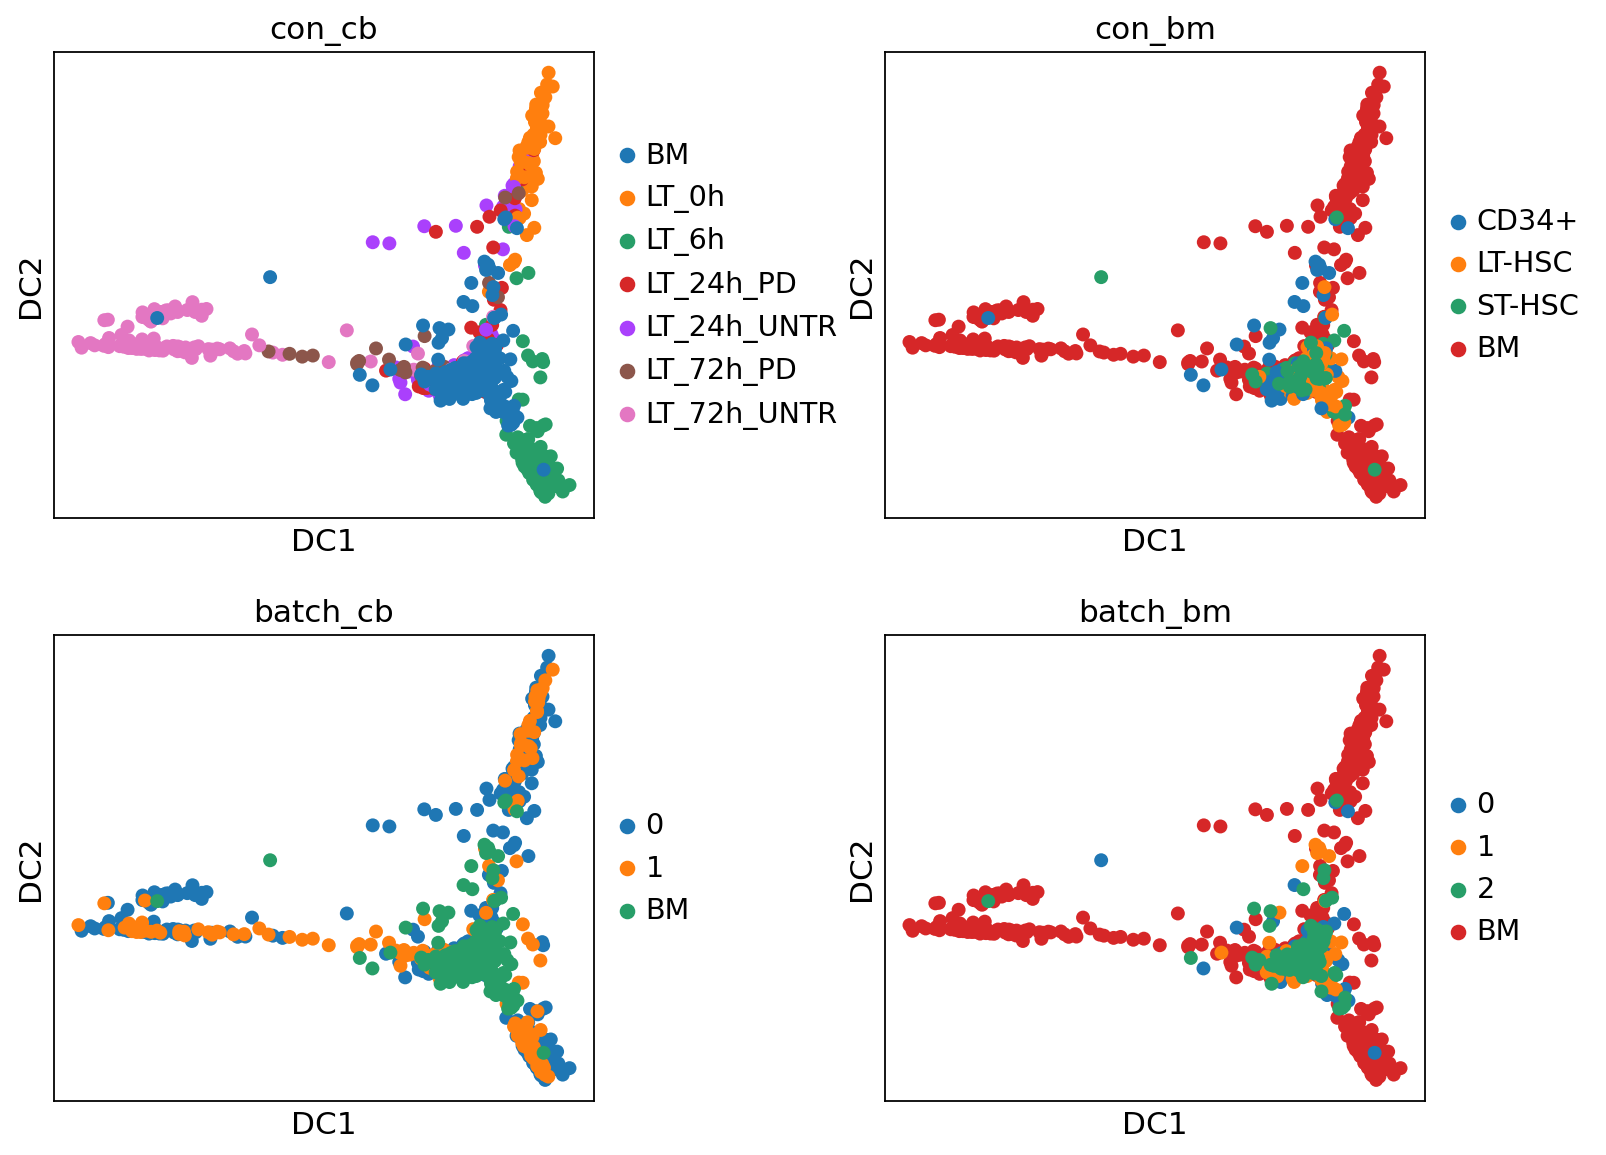

In [22]:
sc.pl.diffmap(comb, color=['con_cb','con_bm', 'batch_cb', 'batch_bm'], ncols=2, wspace=0.4)

In [24]:
comb.write('./write/CBdata_BMDay0_BC_fastMNN.h5ad')

## Method 2 KNN

In [2]:
comb = sc.read('./write/CBdata_BMDay0.h5ad')

In [3]:
smqpp.quick_neighbors(comb)

In [4]:
sc.tl.diffmap(comb)
sc.tl.umap(comb)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [ 1.          0.97721344  0.94643307  0.9313793   0.92476255  0.91184545
      0.8465192   0.82340825  0.81942546  0.78857833  0.77247024  0.74487114
      0.7349448   0.7200107  -0.73800486]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


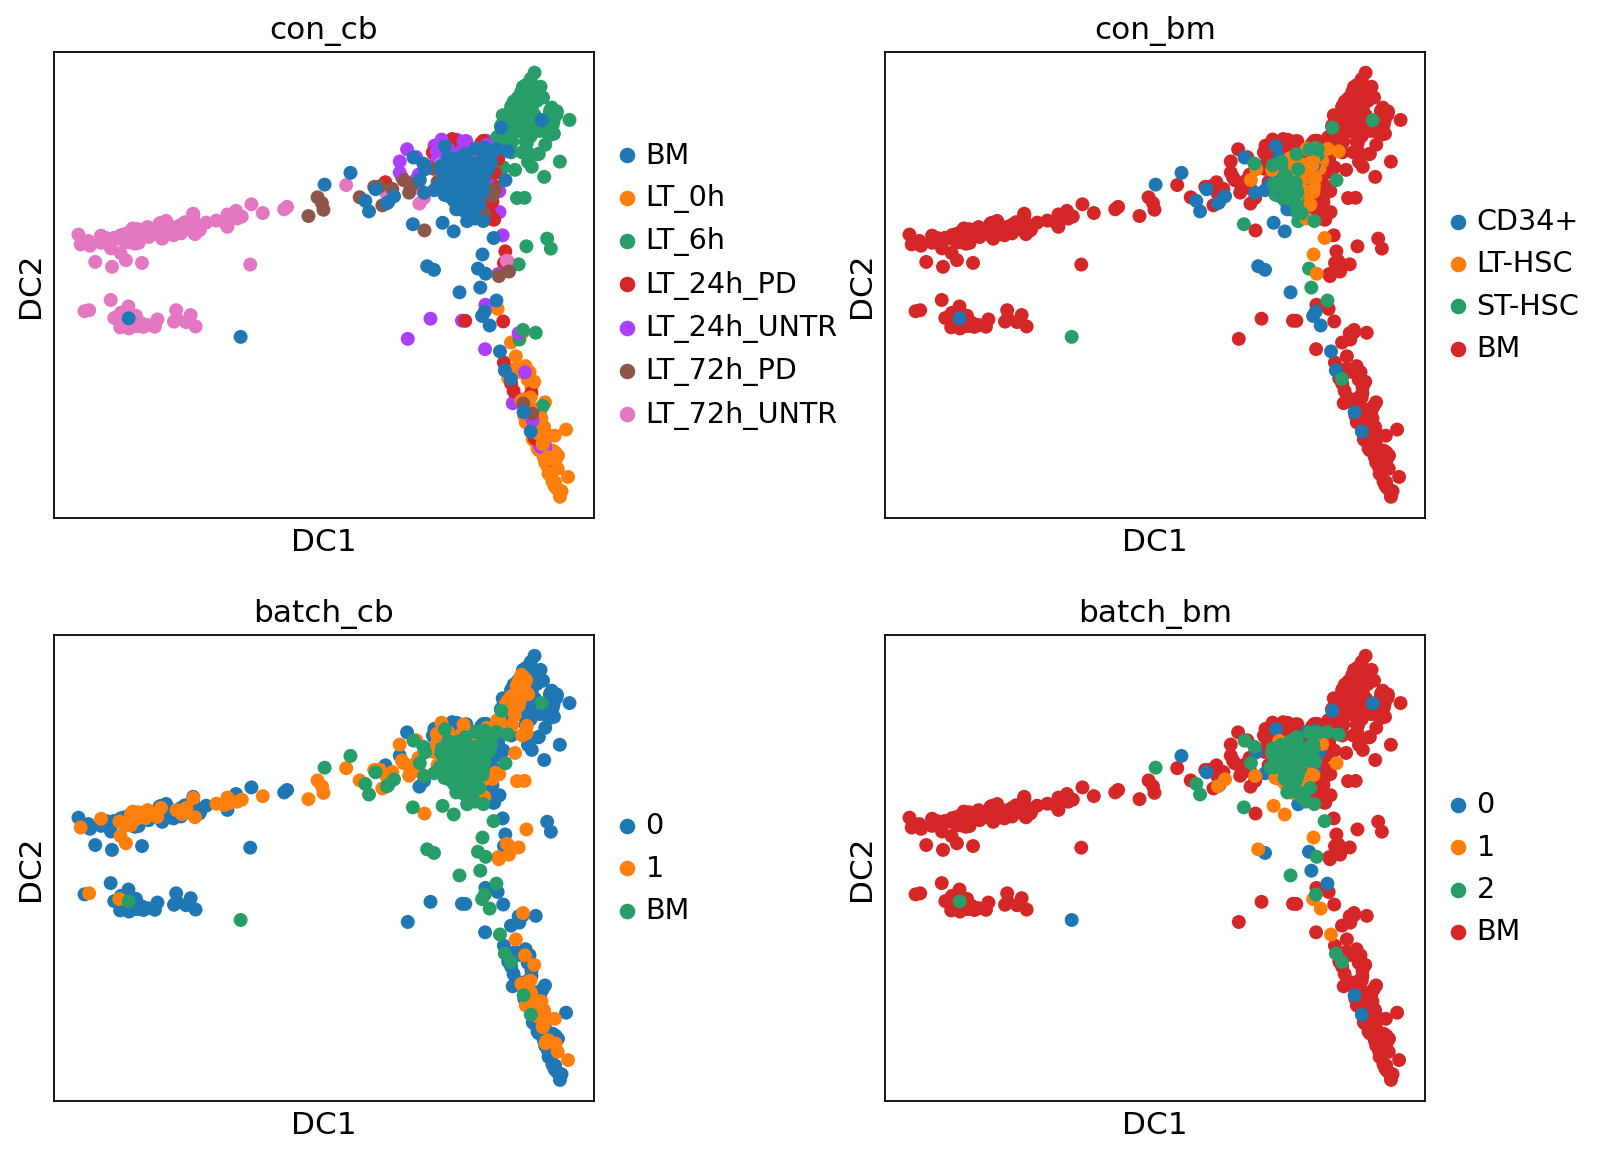

In [5]:
sc.pl.diffmap(comb, color=['con_cb', 'con_bm', 'batch_cb', 'batch_bm'], wspace = 0.4, ncols=2)

In [6]:
comb.write('./write/CBdata_BMDay0_BC_proj.h5ad')

# DPT using fastMNN

In [19]:
comb=sc.read('./write/CBdata_BMDay0_BC_fastMNN.h5ad')

In [20]:
sc.tl.dpt(comb, n_branchings=1, n_dcs=10)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs)
    'dpt_groups', the branching subgroups of dpt (adata.obs)
    'dpt_order', cell order (adata.obs) (0:00:00)


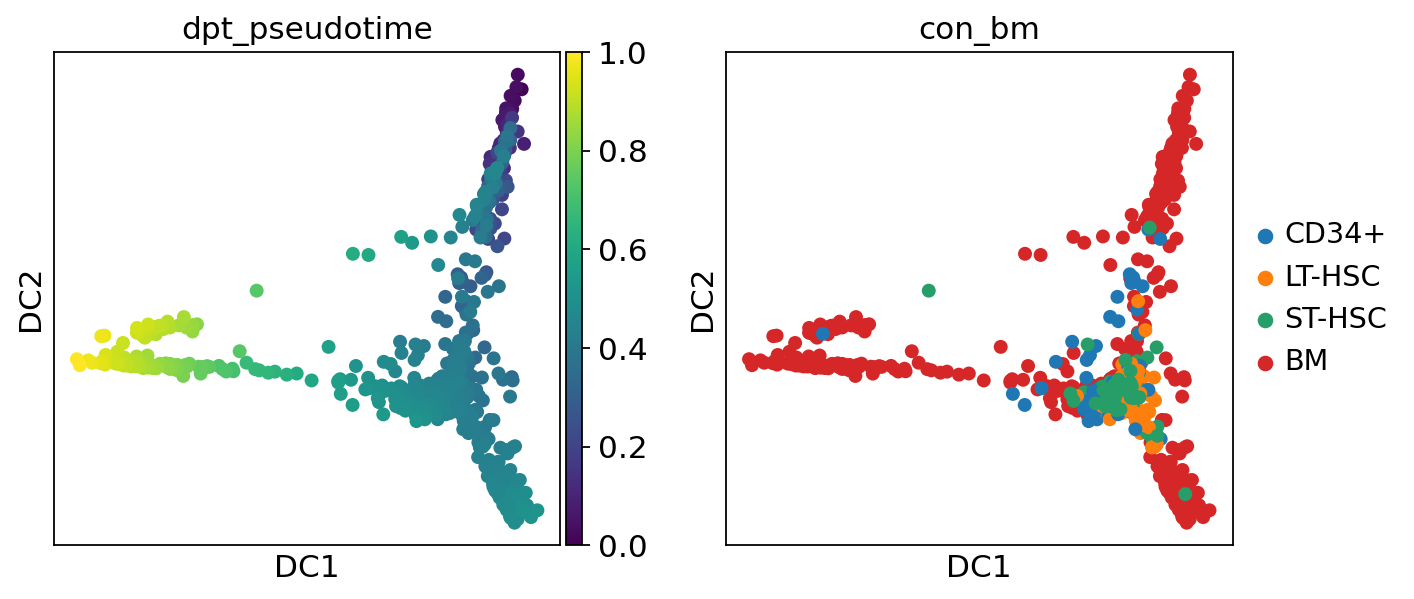

In [21]:
sc.pl.diffmap(comb, color=['dpt_pseudotime', 'con_bm'])

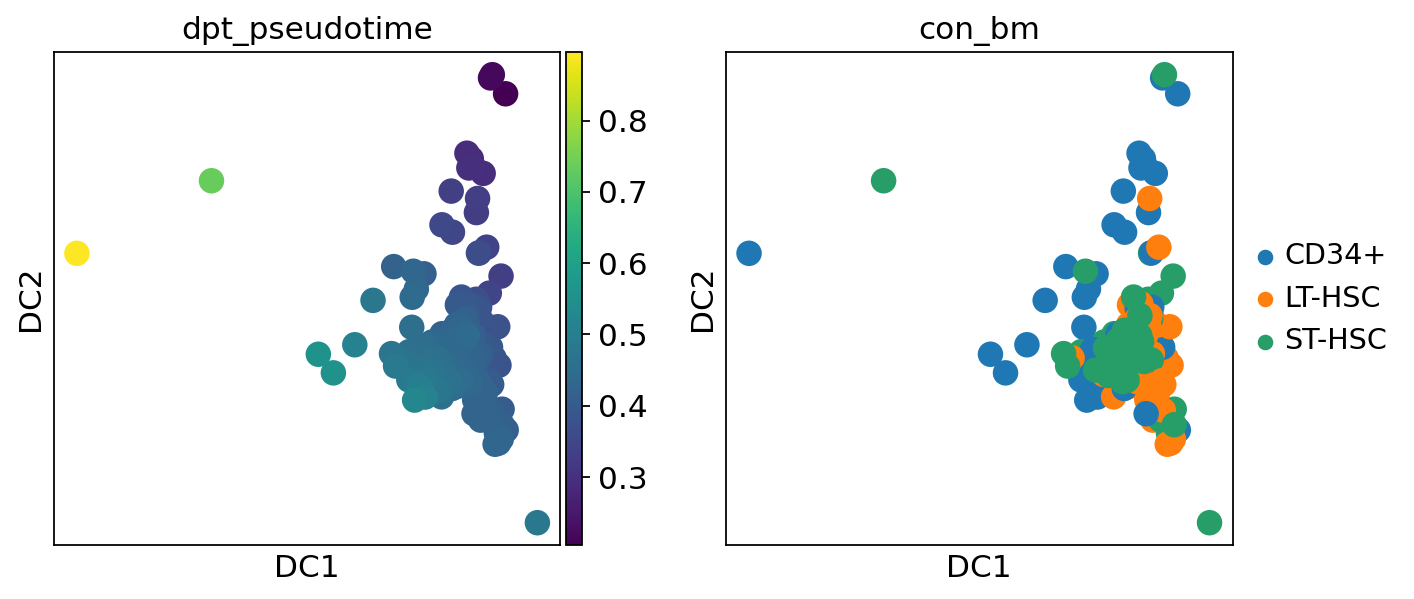

In [22]:
sc.pl.diffmap(comb[comb.obs['batch']=='1',:], color=['dpt_pseudotime', 'con_bm'])

In [23]:
adata = sc.read('./write/BM789_Day0_processed_regressout_ngene_BC.h5ad')

In [24]:
adata.obs['dpt_pseudotime'] = comb[comb.obs['batch']=='1',:].obs['dpt_pseudotime'].values

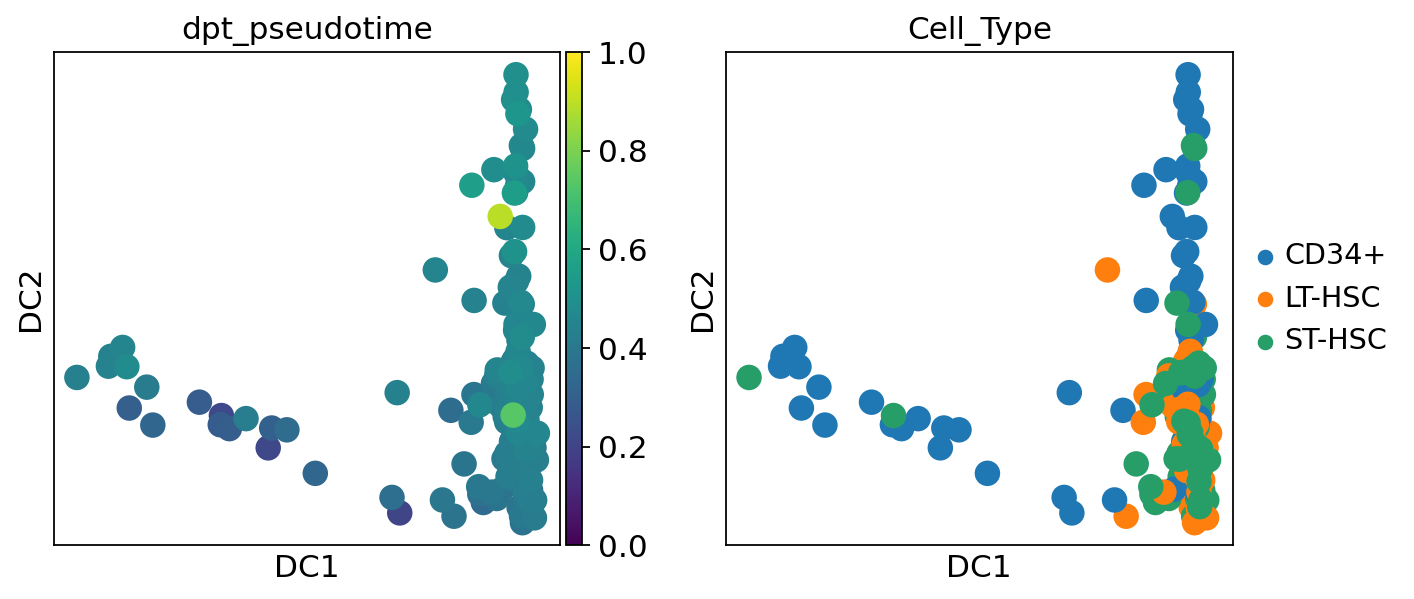

In [25]:
sc.pl.diffmap(adata, color=['dpt_pseudotime', 'Cell_Type'], vmin=0, vmax=1)

In [41]:
DEgene_pt = smqpp.GeneExp_LLR_test(adata, alt_obs=['dpt_pseudotime', 'n_genes', 'batch'], useHVG=True, null_obs=['n_genes', 'batch'])

In [42]:
DEgene_pt.head(3)

pval          padj
CHST15        4.392645e-69  1.051599e-65
RP11-367H1.1  2.154388e-63  2.578803e-60
RP11-148B3.1  4.140103e-62  3.303802e-59

In [43]:
DEgene_pt.to_csv('BM789_Day0_DEgene_pt.csv')

### Here test it with the monocle R package to see if the results are consistent

In [44]:
norm_hvg = adata.raw[:,adata.var_names]
input_matrix = pd.DataFrame(data=norm_hvg.X.transpose(), index=norm_hvg.var_names, columns=adata.obs_names)
input_pd = adata.obs[adata.obs_keys()]
input_fd = adata.var[adata.var_keys()]

In [45]:
%reload_ext rpy2.ipython

In [46]:
%%R -i input_matrix -i input_pd -i input_fd -o out1
library(monocle)
pd <- new("AnnotatedDataFrame", data=input_pd)
fd <- new("AnnotatedDataFrame", data=input_fd)
MDS <- newCellDataSet(as.matrix(input_matrix), featureData = fd, phenoData = pd, expressionFamily=gaussianff())

###
print("P1 starts")
pData(MDS)$Pseudotime <- pData(MDS)$dpt_pseudotime 
out1 <- differentialGeneTest(MDS, fullModelFormulaStr="~sm.ns(Pseudotime, df=3)")
out1$geneID <- rownames(input_fd)
out1 <- out1[order(out1$qval),]
write.table(out1, "Monocle_BM789_Day0.txt",quote=F, row.names=T, col.names=T, sep="\t")
print("P1 ends")

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘Matrix’


R[write to console]: The following object is masked from ‘package:S4Vectors’:

    expand


R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: VGAM

R[write to console]: Loading required package: splines

R[write to console]: Loading required package: DDRTree

R[write to console]: Loading required package: irlba



[1] "P1 starts"
[1] "P1 ends"


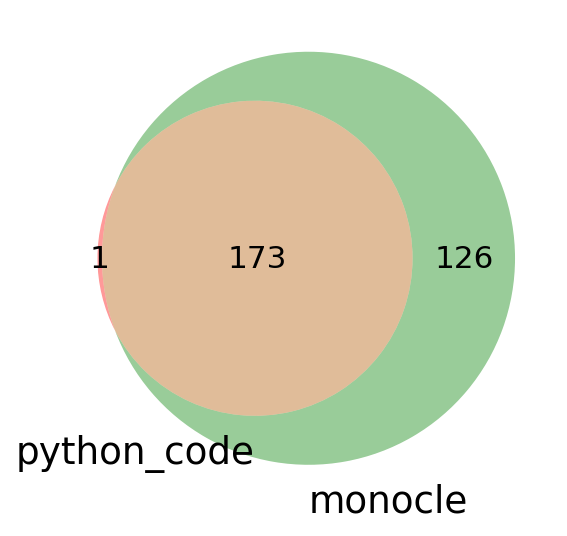

In [47]:
from matplotlib_venn import venn2
set1 = set(DEgene_pt.index.values[DEgene_pt['padj'] < 0.01])
set2 = set(out1.index.values[out1['qval'] < 0.01])
venn2([set1, set2], ('python_code', 'monocle'))

### They work similarly, so just use the python results

In [48]:
sigG = DEgene_pt.index[DEgene_pt['padj'] < 0.001]
print(len(sigG))

116


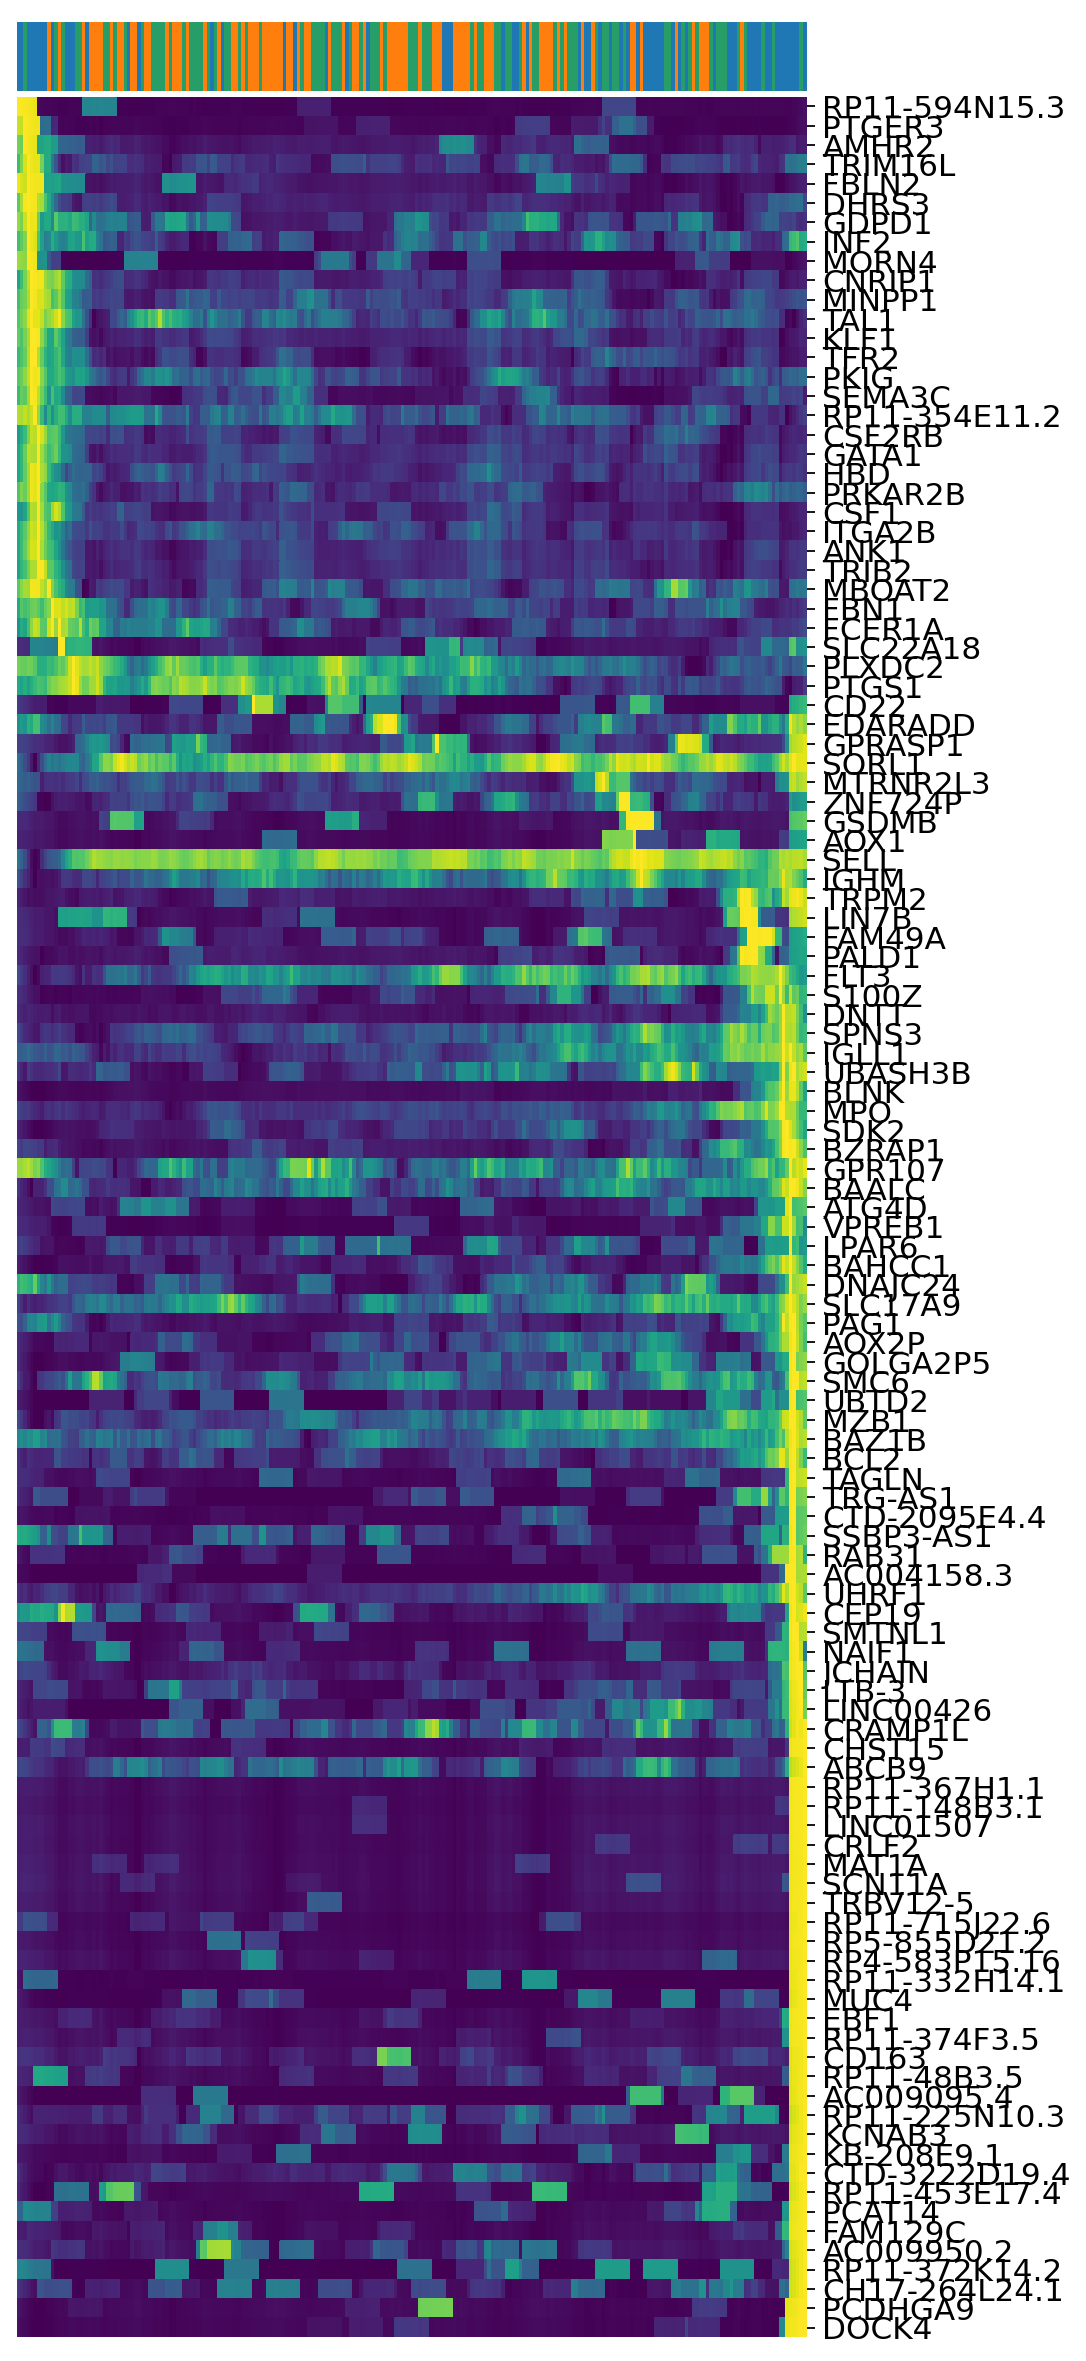

In [52]:
import scvelo as scv
scv.pl.heatmap(adata, var_names=sigG, tkey='dpt_pseudotime', n_convolve=10, col_color='Cell_Type', figsize=(7,15), yticklabels=True)

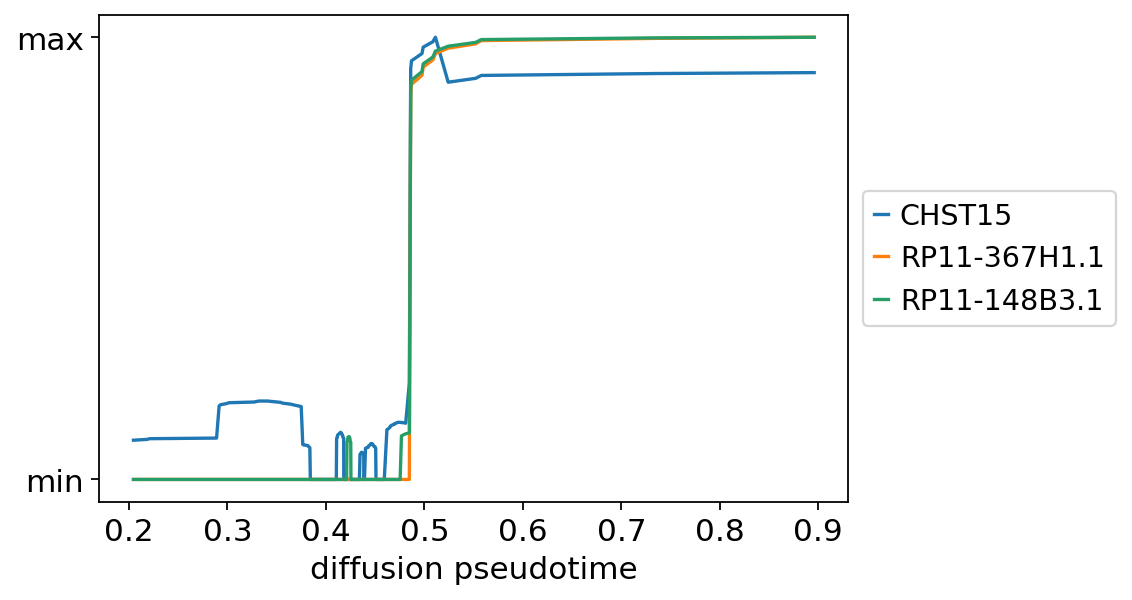

In [53]:
smqpp.plot_genes_along_pt(adata, genes=sigG[0:3], sigma=20)

In [54]:
GL1 = ['FCER1A', 'CD74', 'CDK6',  
       'HLA-DRB9', 'HLA-DRA', 'HLA-DRB1', 
      'HLA-DRB6']

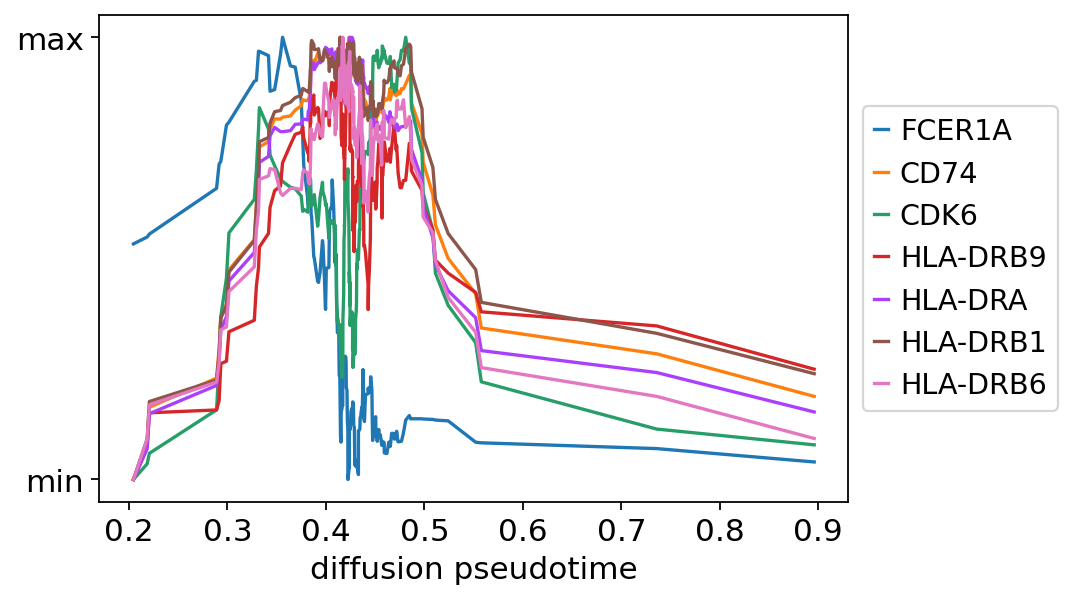

In [61]:
smqpp.plot_genes_along_pt(adata, genes=GL1, w=0.1, sigma=20)

# Project onto Umap

In [8]:
CBdata = sc.read('../MPB1234/write/CBdata_processed_BC_fastMNN.h5ad')

In [9]:
adata = sc.read('./write/BM789_Day0_processed_regressout_ngene_BC.h5ad')

In [10]:
umap_ref = smqpp.quick_umap(CBdata)

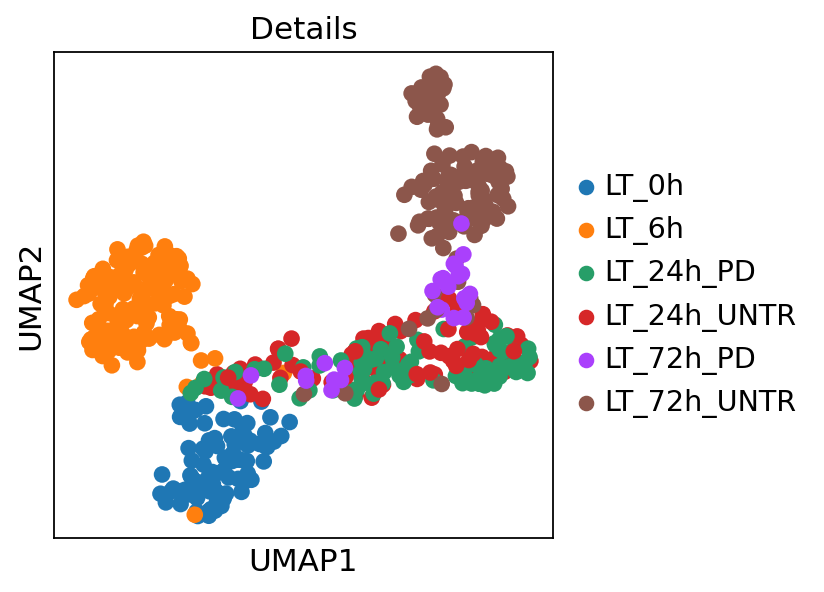

In [11]:
sc.pl.umap(CBdata, color='Details')

In [12]:
X1_umap = smqpp.quick_umap_proj(adata, umap_ref)

In [14]:
comb =sc.read('./write/CBdata_BMDay0.h5ad')

In [15]:
comb.obsm['X_umap'] = np.concatenate((CBdata.obsm['X_umap'], X1_umap), axis=0)

In [17]:
comb.obs['con_cb'] = comb.obs['con_cb'].astype('category')
comb.obs['con_cb'] = comb.obs['con_cb'].cat.reorder_categories(['LT_0h', 'LT_6h', 'LT_24h_PD', 'LT_24h_UNTR', 'LT_72h_PD', 'LT_72h_UNTR', 'BM'])

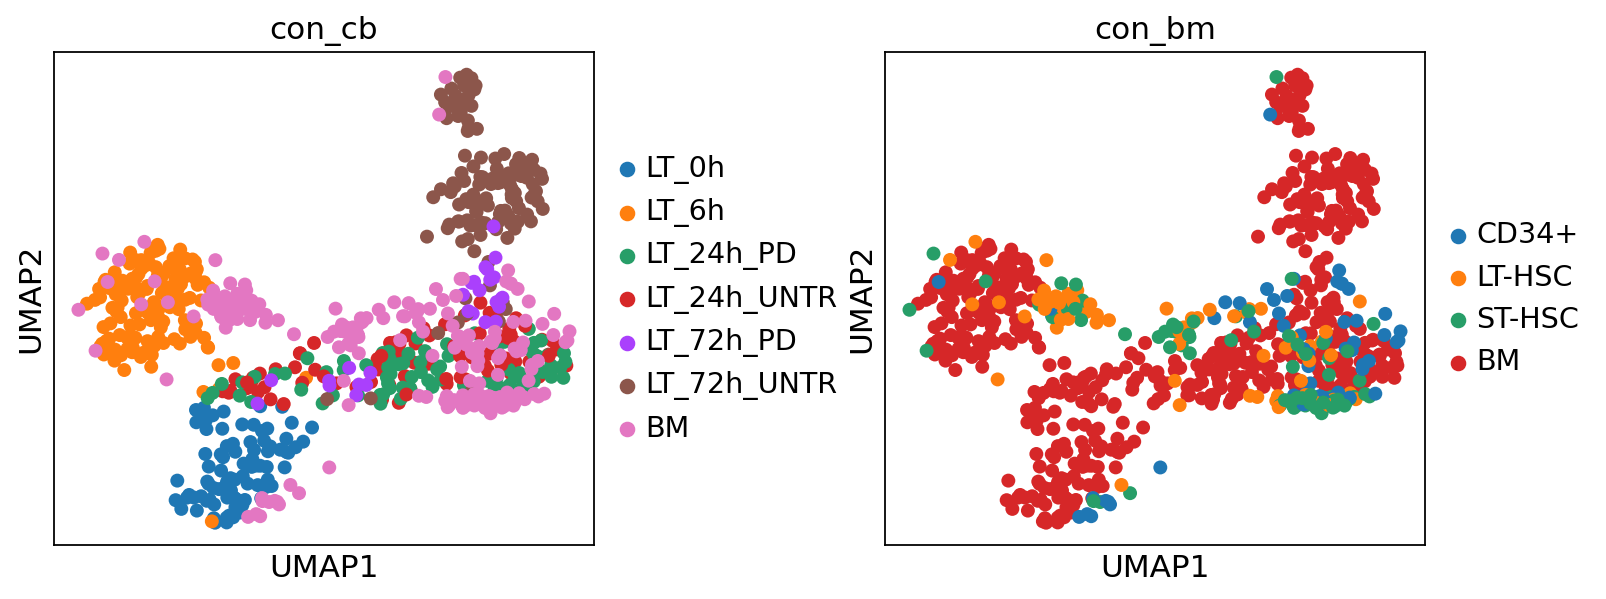

In [18]:
sc.pl.umap(comb, color=['con_cb', 'con_bm'], wspace=0.4)

# Project onto Umap Kuffman

In [3]:
Kuffdata = sc.read('../MPB1234/write/kuffman_processed_MPB.h5ad')
adata = sc.read('./write/BM789_Day0_processed_regressout_ngene_BC.h5ad')

In [4]:
umap_ref = smqpp.quick_umap(Kuffdata)
X1_umap = smqpp.quick_umap_proj(adata, umap_ref)

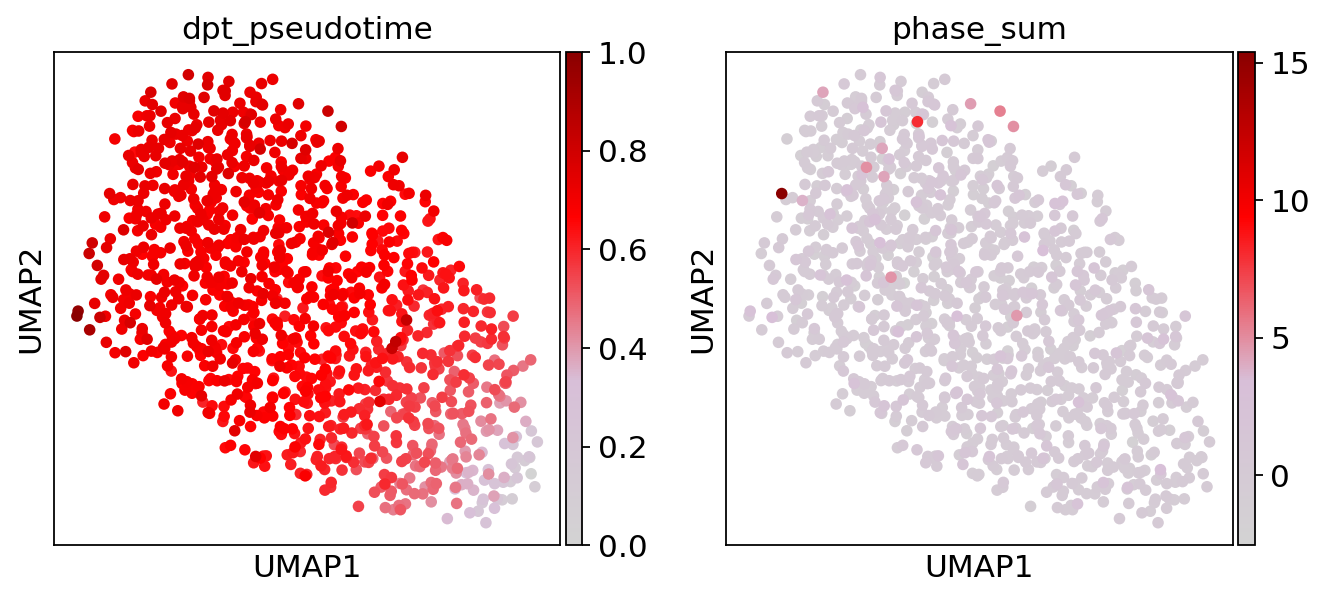

In [5]:
sc.pl.umap(Kuffdata, color=['dpt_pseudotime', 'phase_sum'], color_map=cmap)

In [6]:
adata.obsm['X_umap'] = X1_umap

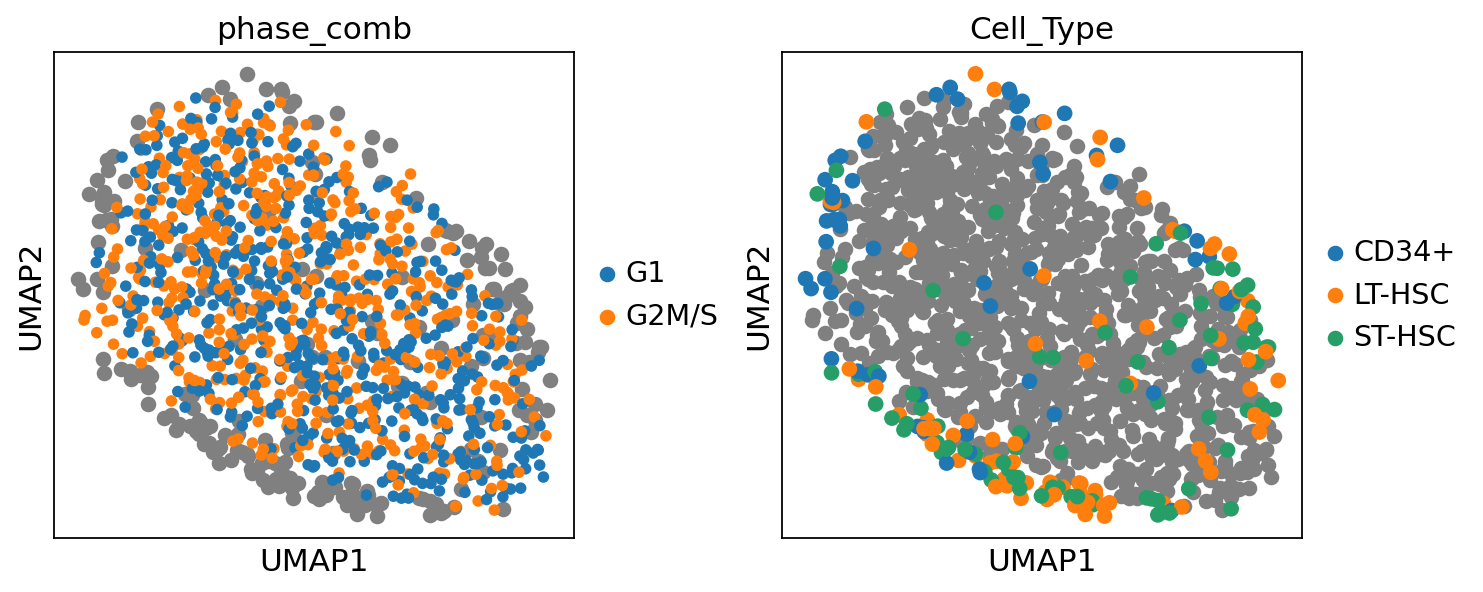

In [11]:
fig, ax = plt.subplots(1,2,sharex=True, sharey=True, figsize=(10,4))
ax[0].scatter(X1_umap[:,0], X1_umap[:,1], c='grey')
sc.pl.umap(Kuffdata, color='phase_comb', show=False, ax=ax[0])
ax[1].scatter(Kuffdata.obsm['X_umap'][:,0], Kuffdata.obsm['X_umap'][:,1], c='grey')
sc.pl.umap(adata, color='Cell_Type', show=False, ax=ax[1], s=200)
plt.subplots_adjust(wspace=0.4)